In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


### Part 1

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter, WeekdayLocator
from sklearn import metrics

In [3]:
df = pd.read_csv('sales_data.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,sales
0,2019-01-01,280.58
1,2019-01-02,1044.56
2,2019-01-03,1004.34
3,2019-01-04,899.03
4,2019-01-05,551.13


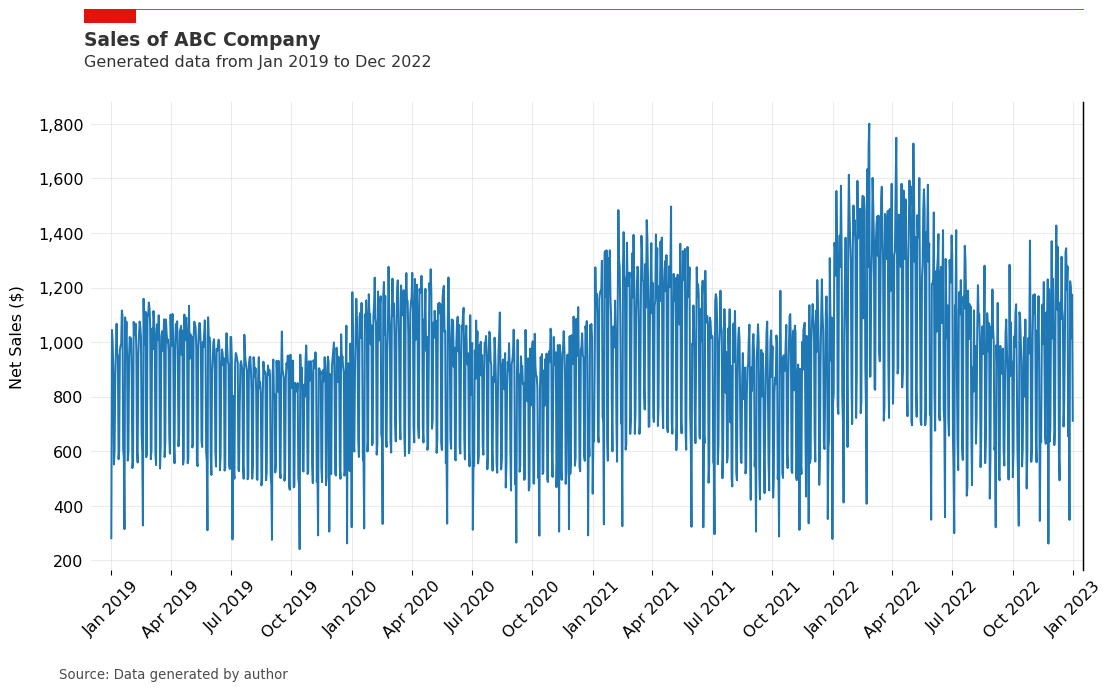

In [4]:
# Create the figure and axes objects, headcify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot line
line = ax.plot(df['date'], df['sales'], zorder=2)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=45)
ax.set_xlim([datetime.date(2018, 12, 1), datetime.date(2023, 1, 15)])

# Reformat y-axis
ax.set_ylabel('Net Sales ($)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Sales of ABC Company", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.90, s="Generated data from Jan 2019 to Dec 2022", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
ax.text(x=0.1, y=0.05, s="Source: Data generated by author", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Export plot as high resolution PNG
plt.savefig('Sales of ABC Company.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

plt.show()

In [5]:
from prophet import Prophet

# Rename the columns
df.columns = ['ds', 'y']

# Creating an instance of the Prophet class and training the model
m = Prophet() #instantiating a new Prophet object
model = m.fit(df) #build the model with the historical data

future = model.make_future_dataframe(periods=60, freq='D') #build the dataframe containing the predictions (and the historical data with the model fit)
forecast = model.predict(future) #The forecast object here is a new dataframe that includes a column yhat with the forecast

forecast[['ds', 'trend', 'weekly', 'yearly', 'yhat']].tail()

/opt/anaconda3/envs/prophet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:01:02 - cmdstanpy - INFO - Chain [1] start processing
17:01:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,weekly,yearly,yhat
1516,2023-02-25,1050.386478,-309.996417,159.143702,899.533763
1517,2023-02-26,1050.456091,-322.625611,160.105204,887.935683
1518,2023-02-27,1050.525703,44.751144,160.610533,1255.887380
1519,2023-02-28,1050.595316,156.254077,160.691726,1367.541119
1520,2023-03-01,1050.664928,161.460734,160.392361,1372.518024


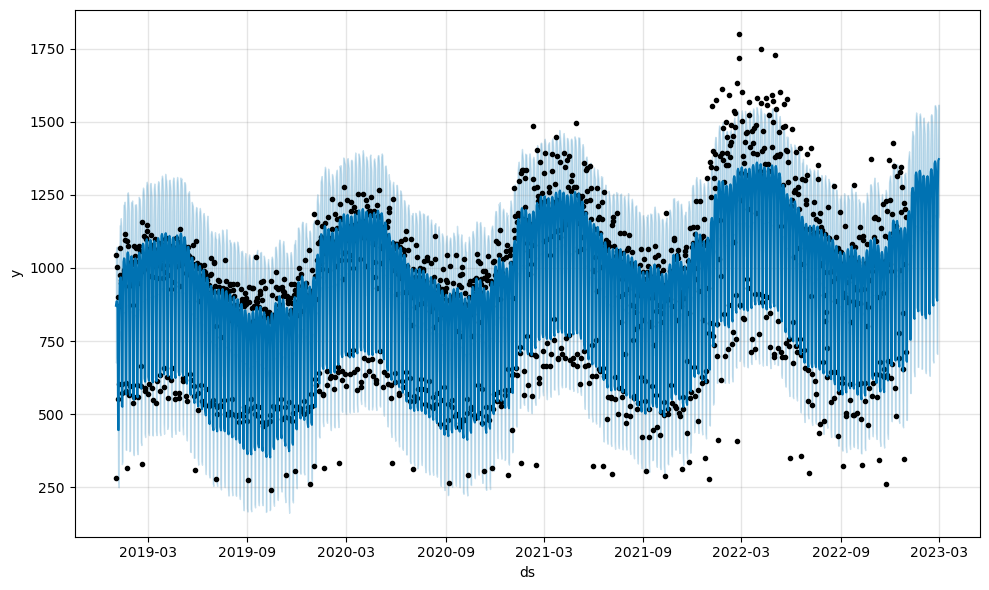

In [6]:
plot1 = model.plot(forecast, uncertainty=True)
#plot1.savefig('FB_prophet_title.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

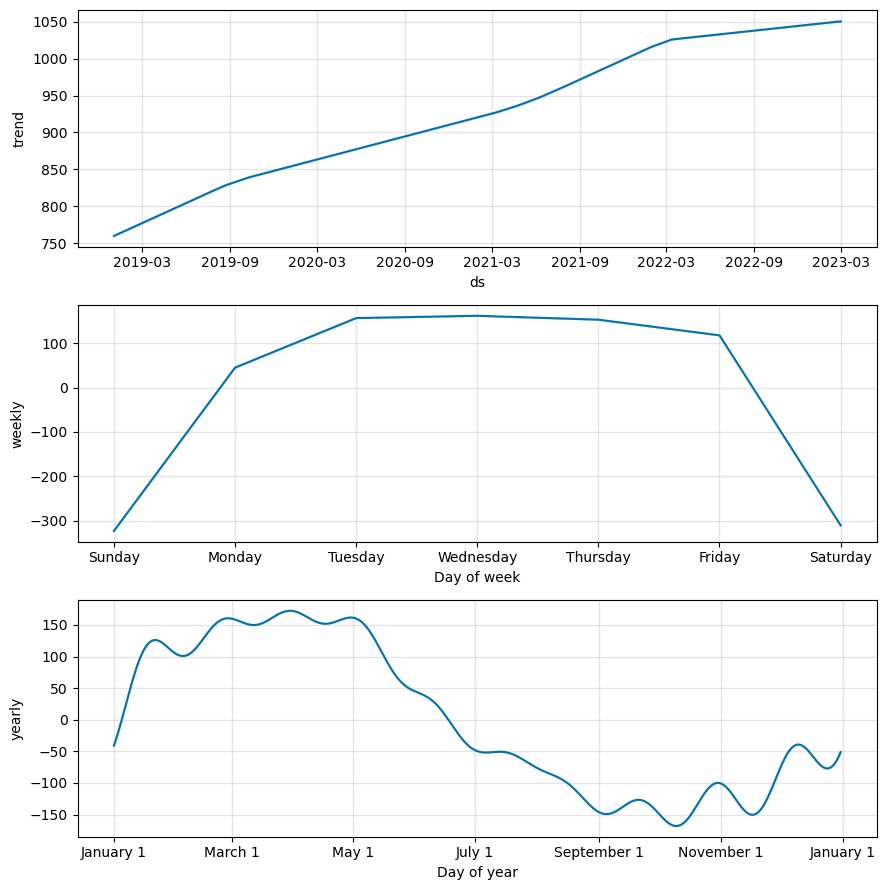

In [7]:
plot2 = model.plot_components(forecast)
#plot2.savefig('FB_prophet_components.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

### Part 2

#### Train Test Split

In [8]:
train = df.iloc[:1400,:]
test = df.iloc[1400:,:]

In [9]:
train.tail()

,ds,y
1395,2022-10-27,1372.31
1396,2022-10-28,991.29
1397,2022-10-29,560.71
1398,2022-10-30,607.31
1399,2022-10-31,1008.87


In [10]:
test

,ds,y
1400,2022-11-01,1172.67
1401,2022-11-02,1107.10
1402,2022-11-03,1175.73
1403,2022-11-04,1092.27
1404,2022-11-05,637.96
...,...,...
1456,2022-12-27,1223.26
1457,2022-12-28,1201.64
1458,2022-12-29,1014.00
1459,2022-12-30,1174.17


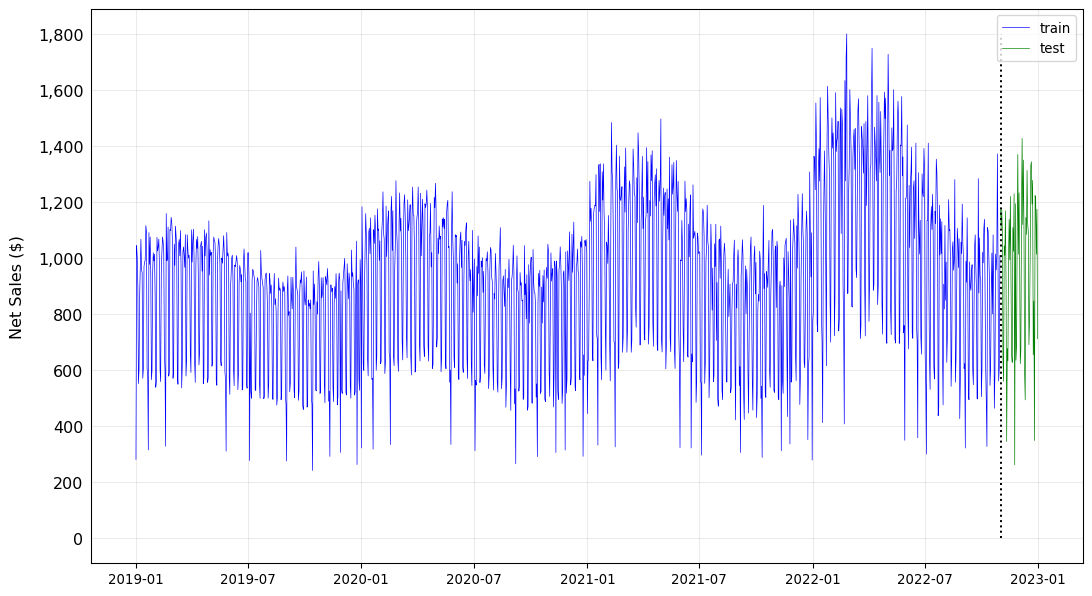

In [11]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot line
train_line = ax.plot(train['ds'], train['y'], color='blue', zorder=2, label='train', linewidth=0.5)
test_line = ax.plot(test['ds'], test['y'], color='green', zorder=2, label='test', linewidth=0.5)
cutoff = pd.to_datetime('2022-11-01')
ax.vlines(x=cutoff, ymin=0, ymax=1800, color='black', linestyle='dotted')

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat y-axis
ax.set_ylabel('Net Sales ($)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

ax.legend()

# Set a white background
fig.patch.set_facecolor('white')

# Export plot as high resolution PNG
plt.savefig('train test.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

plt.show()

In [12]:
train

,ds,y
0,2019-01-01,280.58
1,2019-01-02,1044.56
2,2019-01-03,1004.34
3,2019-01-04,899.03
4,2019-01-05,551.13
...,...,...
1395,2022-10-27,1372.31
1396,2022-10-28,991.29
1397,2022-10-29,560.71
1398,2022-10-30,607.31


#### Basic model

In [13]:
# Creating an instance of the Prophet class and training the model
m = Prophet() #instantiating a new Prophet object
model = m.fit(train) #build the model with the historical data

future = model.make_future_dataframe(periods=len(test), freq='D') #build the dataframe containing the predictions (and the historical data with the model fit)
forecast = model.predict(future) #The forecast object here is a new dataframe that includes a column yhat with the forecast

forecast[['ds', 'trend', 'weekly', 'yearly', 'yhat']].tail()

17:01:20 - cmdstanpy - INFO - Chain [1] start processing
17:01:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,weekly,yearly,yhat
1456,2022-12-27,1057.538821,152.681881,-75.111442,1135.109260
1457,2022-12-28,1057.684283,159.590636,-70.818085,1146.456834
1458,2022-12-29,1057.829746,155.555089,-65.397189,1147.987646
1459,2022-12-30,1057.975209,120.259045,-58.871433,1119.362821
1460,2022-12-31,1058.120671,-309.888489,-51.288926,696.943257


In [14]:
r2_score = metrics.r2_score(list(test['y']), list(forecast.loc[1400:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[1400:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[1400:,'yhat']))

print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')

r2_score : 0.5202501431979667
mae : 123.28699730405783
mse : 38695.33790025462


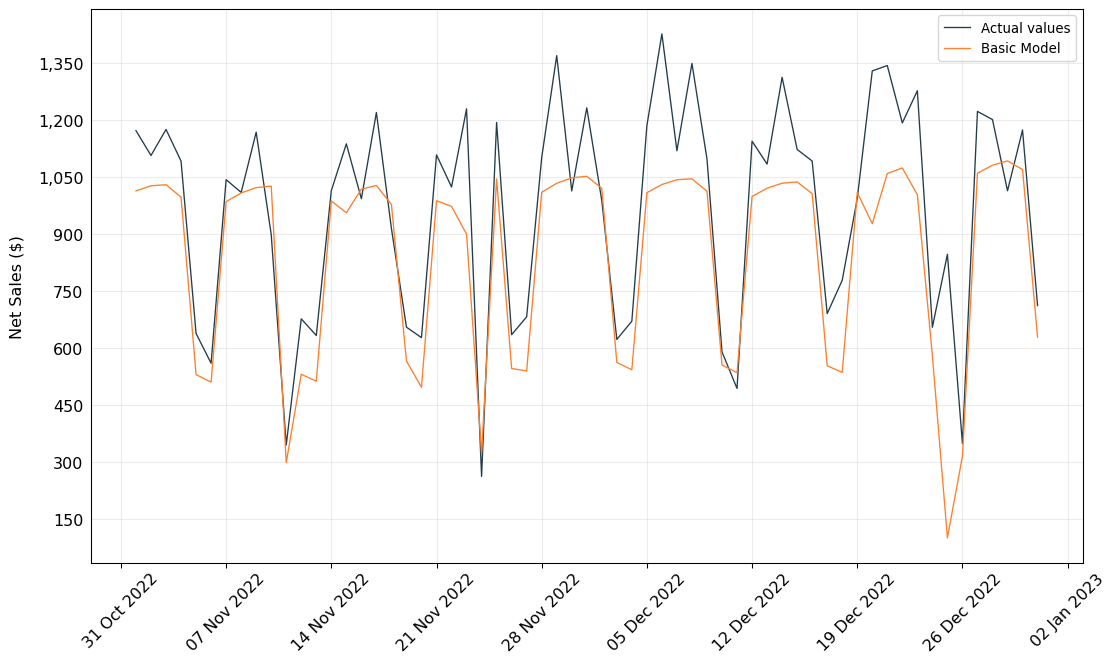

In [33]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot line
line = ax.plot(test['ds'], test['y'], color='#233d4d', zorder=2, label='Actual values', linewidth=1)
line1 = ax.plot(forecast.loc[1400:,'ds'], forecast.loc[1400:,'yhat'], color='#fe7f2d', zorder=2, label='Basic Model', linewidth=1)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat y-axis
ax.set_ylabel('Net Sales ($)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Reformat x-axis label and tick labels
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=45)

ax.legend()

# Set a white background
fig.patch.set_facecolor('white')

# Export plot as high resolution PNG
plt.savefig('basic model.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

plt.show()

#### Adding holidays

In [16]:
black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25']),
  'lower_window': -10,
  'upper_window': 1,
})
xmas_eve = pd.DataFrame({
  'holiday': 'xmas_eve',
  'ds': pd.to_datetime(['2019-12-24', '2020-12-24', '2021-12-24', '2022-12-24']),
  'lower_window': -5,
  'upper_window': 1,
})
holidays = pd.concat((black_friday, xmas_eve))

In [17]:
# Creating an instance of the Prophet class and training the model
m2 = Prophet(holidays=holidays) #instantiating a new Prophet object
m2.add_country_holidays(country_name='US')
model2 = m2.fit(train) #build the model with the historical data

future2 = model2.make_future_dataframe(periods=len(test), freq='D') #build the dataframe containing the predictions (and the historical data with the model fit)
forecast2 = model2.predict(future2) #The forecast object here is a new dataframe that includes a column yhat with the forecast

forecast2[['ds', 'trend', 'weekly', 'yearly', 'yhat']].tail()

17:02:59 - cmdstanpy - INFO - Chain [1] start processing
17:03:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,weekly,yearly,yhat
1456,2022-12-27,1012.277807,134.946250,-28.749118,1118.474938
1457,2022-12-28,1012.056389,148.656443,-20.502064,1140.210768
1458,2022-12-29,1011.834972,150.277895,-11.869871,1150.242996
1459,2022-12-30,1011.613554,120.564624,-2.934939,1129.243240
1460,2022-12-31,1011.392137,-324.278759,6.213648,693.327026


In [18]:
r2_score = metrics.r2_score(list(test['y']), list(forecast2.loc[1400:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast2.loc[1400:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast2.loc[1400:,'yhat']))

print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')

r2_score : 0.6882992915851764
mae : 108.82204515257729
mse : 25140.94389993201


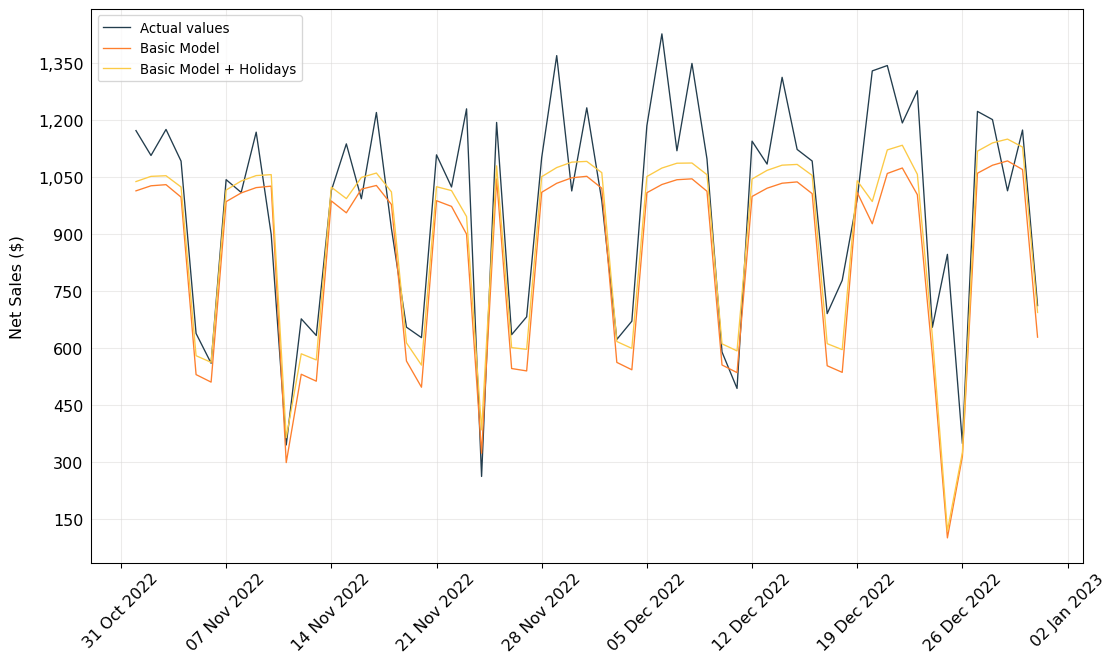

In [32]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot line
line = ax.plot(test['ds'], test['y'], color='#233d4d', zorder=2, label='Actual values', linewidth=1)
line1 = ax.plot(forecast.loc[1400:,'ds'], forecast.loc[1400:,'yhat'], color='#fe7f2d', zorder=2, label='Basic Model', linewidth=1)
line2 = ax.plot(forecast.loc[1400:,'ds'], forecast2.loc[1400:,'yhat'], color='#fcca46', zorder=2, label='Basic Model + Holidays', linewidth=1)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat y-axis
ax.set_ylabel('Net Sales ($)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Reformat x-axis label and tick labels
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=45)

ax.legend()

# Set a white background
fig.patch.set_facecolor('white')

# Export plot as high resolution PNG
plt.savefig('basic model + holidays.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

plt.show()

#### Grid Search

In [21]:
# Create the grid
changepoint_prior_scale = [0.01, 0.03, 0.05, 0.07] # default 0.05
seasonality_prior_scale = [1, 5, 10, 15] # default 10
holidays_prior_scale = [1, 5, 10, 15] # default 10
seasonality_mode = ['additive', 'multiplicative']
changepoint_range = [0.6, 0.7, 0.8, 0.9] # default 0.8

# Compute the total number of iterations
total_iter = len(changepoint_prior_scale)*len(seasonality_prior_scale)*len(holidays_prior_scale)*len(seasonality_mode)*len(changepoint_range)
print(f'Number of iterations : {total_iter}')

# Loop over the parameters and build the models
grid_search_results = []
iteration = 1
for cps in changepoint_prior_scale:
    for sps in seasonality_prior_scale:
        for hps in holidays_prior_scale:
            for sm in seasonality_mode:
                for cr in changepoint_range:
                    m = Prophet(holidays=holidays, 
                                 changepoint_prior_scale = cps, 
                                 seasonality_prior_scale = sps, 
                                 holidays_prior_scale = hps, 
                                 seasonality_mode = sm, 
                                 changepoint_range = cr)
                    m.add_country_holidays(country_name='US')
                    model = m.fit(train)
                    future = model.make_future_dataframe(periods=len(test), freq='D')
                    forecast = model.predict(future) 

                    r2_score = metrics.r2_score(list(test['y']), list(forecast.loc[1400:,'yhat']))
                    mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[1400:,'yhat']))
                    mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[1400:,'yhat']))
                    
                    print(f'iteration : {iteration} / {total_iter} ')
                    print(f'r2_score : {r2_score}')
                    print(f'mae : {mae}')
                    print(f'mse : {mse}')
                    
                    grid_search_results.append([iteration, cps, sps, hps, sm, cr, r2_score, mae, mse])
                    iteration += 1

# Store the results in a dataframe
grid_search_df = pd.DataFrame(grid_search_results, columns = ['iteration', 'cps', 'sps', 'hps', 'sm', 'cr', 'r2_score', 'mae', 'mse'])

17:05:43 - cmdstanpy - INFO - Chain [1] start processing


Number of iterations : 512


17:05:44 - cmdstanpy - INFO - Chain [1] done processing
17:05:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 1 / 512 
r2_score : 0.7615218853939563
mae : 96.91233499505348
mse : 19235.00569236105


17:05:44 - cmdstanpy - INFO - Chain [1] done processing
17:05:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 2 / 512 
r2_score : 0.745931013414413
mae : 98.41290620250724
mse : 20492.523648550843


17:05:44 - cmdstanpy - INFO - Chain [1] done processing
17:05:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 3 / 512 
r2_score : 0.7505533481912
mae : 98.30457447969954
mse : 20119.698511576014


17:05:45 - cmdstanpy - INFO - Chain [1] done processing
17:05:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 4 / 512 
r2_score : 0.7582138375476768
mae : 96.46015045269056
mse : 19501.823967316395


17:05:45 - cmdstanpy - INFO - Chain [1] done processing
17:05:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 5 / 512 
r2_score : 0.7161331691655229
mae : 102.45438989040082
mse : 22895.937918637337


17:05:46 - cmdstanpy - INFO - Chain [1] done processing
17:05:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 6 / 512 
r2_score : 0.726193910482051
mae : 101.2658245588387
mse : 22084.46548305358


17:05:46 - cmdstanpy - INFO - Chain [1] done processing
17:05:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 7 / 512 
r2_score : 0.7142202272279935
mae : 102.36309487428917
mse : 23050.23068935267


17:05:47 - cmdstanpy - INFO - Chain [1] done processing
17:05:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 8 / 512 
r2_score : 0.728683457783162
mae : 100.86214658015187
mse : 21883.66526879753


17:05:47 - cmdstanpy - INFO - Chain [1] done processing
17:05:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 9 / 512 
r2_score : 0.7624042872004932
mae : 96.57720341243244
mse : 19163.83352715114


17:05:48 - cmdstanpy - INFO - Chain [1] done processing
17:05:48 - cmdstanpy - INFO - Chain [1] start processing
17:05:48 - cmdstanpy - INFO - Chain [1] done processing


iteration : 10 / 512 
r2_score : 0.7597107160280155
mae : 96.81133652963467
mse : 19381.089760164294


17:05:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 11 / 512 
r2_score : 0.751913066931013
mae : 98.1825722520478
mse : 20010.027241558142


17:05:49 - cmdstanpy - INFO - Chain [1] done processing
17:05:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 12 / 512 
r2_score : 0.7513827924308495
mae : 97.88507854348286
mse : 20052.797761804868


17:05:49 - cmdstanpy - INFO - Chain [1] done processing
17:05:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 13 / 512 
r2_score : 0.722380370990019
mae : 102.30834696469543
mse : 22392.055359627608


17:05:50 - cmdstanpy - INFO - Chain [1] done processing
17:05:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 14 / 512 
r2_score : 0.7208067593850329
mae : 102.41429527675972
mse : 22518.978654997805


17:05:50 - cmdstanpy - INFO - Chain [1] done processing
17:05:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 15 / 512 
r2_score : 0.7093482933994361
mae : 101.60469994784663
mse : 23443.1878170116


17:05:51 - cmdstanpy - INFO - Chain [1] done processing
17:05:51 - cmdstanpy - INFO - Chain [1] start processing
17:05:51 - cmdstanpy - INFO - Chain [1] done processing


iteration : 16 / 512 
r2_score : 0.7226379165706618
mae : 102.00104219997887
mse : 22371.28242321836


17:05:51 - cmdstanpy - INFO - Chain [1] start processing
17:05:51 - cmdstanpy - INFO - Chain [1] done processing


iteration : 17 / 512 
r2_score : 0.7489910739758204
mae : 98.65113038261951
mse : 20245.707363480506


17:05:52 - cmdstanpy - INFO - Chain [1] start processing
17:05:52 - cmdstanpy - INFO - Chain [1] done processing


iteration : 18 / 512 
r2_score : 0.7485941317119689
mae : 99.11790088928096
mse : 20277.723662826622


17:05:52 - cmdstanpy - INFO - Chain [1] start processing
17:05:52 - cmdstanpy - INFO - Chain [1] done processing


iteration : 19 / 512 
r2_score : 0.7445024714226136
mae : 99.26608771779797
mse : 20607.74601765348


17:05:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 20 / 512 
r2_score : 0.754954034881963
mae : 97.85466868976285
mse : 19764.75091528628


17:05:53 - cmdstanpy - INFO - Chain [1] done processing
17:05:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 21 / 512 
r2_score : 0.7287522893451769
mae : 102.98854222518327
mse : 21878.11349944814


17:05:53 - cmdstanpy - INFO - Chain [1] done processing
17:05:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 22 / 512 
r2_score : 0.7366075942054435
mae : 100.36331943971086
mse : 21244.525658685194


17:05:54 - cmdstanpy - INFO - Chain [1] done processing
17:05:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 23 / 512 
r2_score : 0.7050408004426674
mae : 103.42832376343415
mse : 23790.61865644156


17:05:54 - cmdstanpy - INFO - Chain [1] done processing
17:05:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 24 / 512 
r2_score : 0.7260076417061412
mae : 101.67238031847953
mse : 22099.48942338812


17:05:55 - cmdstanpy - INFO - Chain [1] done processing
17:05:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 25 / 512 
r2_score : 0.7564494074783267
mae : 97.10470601494302
mse : 19644.138168700403


17:05:55 - cmdstanpy - INFO - Chain [1] done processing
17:05:55 - cmdstanpy - INFO - Chain [1] start processing
17:05:55 - cmdstanpy - INFO - Chain [1] done processing


iteration : 26 / 512 
r2_score : 0.7471844936980274
mae : 98.825840333538
mse : 20391.42128773079


17:05:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 27 / 512 
r2_score : 0.7562443723869549
mae : 97.18532996068431
mse : 19660.67574975343


17:05:56 - cmdstanpy - INFO - Chain [1] done processing
17:05:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 28 / 512 
r2_score : 0.7533068446565138
mae : 96.84441161417512
mse : 19897.608865019974


17:05:56 - cmdstanpy - INFO - Chain [1] done processing
17:05:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 29 / 512 
r2_score : 0.7248200917870598
mae : 102.21840026648039
mse : 22195.274017673542


17:05:57 - cmdstanpy - INFO - Chain [1] done processing
17:05:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 30 / 512 
r2_score : 0.725795808319829
mae : 101.7895125581472
mse : 22116.57533669415


17:05:57 - cmdstanpy - INFO - Chain [1] done processing
17:05:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 31 / 512 
r2_score : 0.7199169242952478
mae : 101.90071797124334
mse : 22590.750368916106


17:05:58 - cmdstanpy - INFO - Chain [1] done processing
17:05:58 - cmdstanpy - INFO - Chain [1] start processing
17:05:58 - cmdstanpy - INFO - Chain [1] done processing


iteration : 32 / 512 
r2_score : 0.7288247444816405
mae : 100.32436599914334
mse : 21872.269462293538


17:05:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 33 / 512 
r2_score : 0.750588481815707
mae : 97.838262439952
mse : 20116.864727568194


17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing


iteration : 34 / 512 
r2_score : 0.7563268448285848
mae : 96.9339869887719
mse : 19654.023743606722


17:06:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 35 / 512 
r2_score : 0.7488923926871388
mae : 98.5197173183377
mse : 20253.66673179678


17:06:00 - cmdstanpy - INFO - Chain [1] done processing
17:06:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 36 / 512 
r2_score : 0.7535069915658479
mae : 97.54003955873083
mse : 19881.465551631623


17:06:00 - cmdstanpy - INFO - Chain [1] done processing
17:06:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 37 / 512 
r2_score : 0.7186598768627643
mae : 102.20879405349373
mse : 22692.14044640531


17:06:01 - cmdstanpy - INFO - Chain [1] done processing
17:06:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 38 / 512 
r2_score : 0.7245941046247957
mae : 101.9881877602284
mse : 22213.50153662107


17:06:01 - cmdstanpy - INFO - Chain [1] done processing
17:06:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 39 / 512 
r2_score : 0.7306092763543249
mae : 100.21636596168551
mse : 21728.33390331786


17:06:02 - cmdstanpy - INFO - Chain [1] done processing
17:06:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 40 / 512 
r2_score : 0.719614027316944
mae : 101.4914623428828
mse : 22615.181227535966


17:06:02 - cmdstanpy - INFO - Chain [1] done processing
17:06:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 41 / 512 
r2_score : 0.7590857540574487
mae : 96.8251822876105
mse : 19431.4975180469


17:06:03 - cmdstanpy - INFO - Chain [1] done processing
17:06:03 - cmdstanpy - INFO - Chain [1] start processing
17:06:03 - cmdstanpy - INFO - Chain [1] done processing


iteration : 42 / 512 
r2_score : 0.7525949505578865
mae : 97.89127021855067
mse : 19955.028335406492


17:06:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 43 / 512 
r2_score : 0.7426582806847066
mae : 99.49554767327794
mse : 20756.493500834644


17:06:03 - cmdstanpy - INFO - Chain [1] done processing
17:06:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 44 / 512 
r2_score : 0.7533094071669777
mae : 96.49463509387891
mse : 19897.402179792523


17:06:04 - cmdstanpy - INFO - Chain [1] done processing
17:06:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 45 / 512 
r2_score : 0.7245779662067819
mae : 103.2396524251703
mse : 22214.803218173154


17:06:04 - cmdstanpy - INFO - Chain [1] done processing
17:06:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 46 / 512 
r2_score : 0.7170358288314125
mae : 103.25210399720575
mse : 22823.1318087755


17:06:05 - cmdstanpy - INFO - Chain [1] done processing
17:06:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 47 / 512 
r2_score : 0.7129456979132004
mae : 102.29098104021506
mse : 23153.0308086241


17:06:05 - cmdstanpy - INFO - Chain [1] done processing
17:06:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 48 / 512 
r2_score : 0.7298298432983352
mae : 100.2468494586748
mse : 21791.200885026192


17:06:06 - cmdstanpy - INFO - Chain [1] done processing
17:06:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 49 / 512 
r2_score : 0.758250200801657
mae : 96.67397915964987
mse : 19498.891004690217


17:06:06 - cmdstanpy - INFO - Chain [1] done processing
17:06:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 50 / 512 
r2_score : 0.7577985980715323
mae : 97.20388364609596
mse : 19535.316070776407


17:06:07 - cmdstanpy - INFO - Chain [1] done processing
17:06:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 51 / 512 
r2_score : 0.7530342980698329
mae : 97.92975347843411
mse : 19919.591742379187


17:06:07 - cmdstanpy - INFO - Chain [1] done processing
17:06:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 52 / 512 
r2_score : 0.7549250079133482
mae : 96.74287417708223
mse : 19767.092152793375


17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 53 / 512 
r2_score : 0.720829586081801
mae : 103.8053560129828
mse : 22517.13751480346


17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 54 / 512 
r2_score : 0.7177764884329124
mae : 102.78797953805221
mse : 22763.392190008024


17:06:09 - cmdstanpy - INFO - Chain [1] done processing
17:06:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 55 / 512 
r2_score : 0.715128048256324
mae : 102.6514970079825
mse : 22977.008277826855


17:06:09 - cmdstanpy - INFO - Chain [1] done processing
17:06:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 56 / 512 
r2_score : 0.7183801977419022
mae : 102.31223461199278
mse : 22714.698614859073


17:06:09 - cmdstanpy - INFO - Chain [1] done processing
17:06:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 57 / 512 
r2_score : 0.7553710277654964
mae : 97.80268406109975
mse : 19731.11738668476


17:06:10 - cmdstanpy - INFO - Chain [1] done processing
17:06:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 58 / 512 
r2_score : 0.7588062099598538
mae : 96.66286526806059
mse : 19454.044795885737


17:06:10 - cmdstanpy - INFO - Chain [1] done processing
17:06:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 59 / 512 
r2_score : 0.7494833607095224
mae : 98.59475394057304
mse : 20206.000834683622


17:06:11 - cmdstanpy - INFO - Chain [1] done processing
17:06:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 60 / 512 
r2_score : 0.7538503455943402
mae : 97.74863712108005
mse : 19853.771535753247


17:06:11 - cmdstanpy - INFO - Chain [1] done processing
17:06:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 61 / 512 
r2_score : 0.7108848100600059
mae : 102.23250500225157
mse : 23319.256500457494


17:06:12 - cmdstanpy - INFO - Chain [1] done processing
17:06:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 62 / 512 
r2_score : 0.719881292206858
mae : 102.65944627535148
mse : 22593.624357685003


17:06:12 - cmdstanpy - INFO - Chain [1] done processing
17:06:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 63 / 512 
r2_score : 0.7070345391978857
mae : 102.70173319536232
mse : 23629.809030916556


17:06:13 - cmdstanpy - INFO - Chain [1] done processing
17:06:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 64 / 512 
r2_score : 0.7202846361724843
mae : 101.67188955511777
mse : 22561.091714227907


17:06:13 - cmdstanpy - INFO - Chain [1] done processing
17:06:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 65 / 512 
r2_score : 0.7584803765771115
mae : 97.00539249784867
mse : 19480.32564342666


17:06:14 - cmdstanpy - INFO - Chain [1] done processing
17:06:14 - cmdstanpy - INFO - Chain [1] start processing
17:06:14 - cmdstanpy - INFO - Chain [1] done processing


iteration : 66 / 512 
r2_score : 0.7559882797687127
mae : 97.32794411259695
mse : 19681.33149410883


17:06:14 - cmdstanpy - INFO - Chain [1] start processing
17:06:14 - cmdstanpy - INFO - Chain [1] done processing


iteration : 67 / 512 
r2_score : 0.748318896221402
mae : 98.459048248777
mse : 20299.923419968014


17:06:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 68 / 512 
r2_score : 0.7531143876891868
mae : 97.23286358163932
mse : 19913.13192829219


17:06:15 - cmdstanpy - INFO - Chain [1] done processing
17:06:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 69 / 512 
r2_score : 0.7171239788863664
mae : 102.89056999611218
mse : 22816.02186155196


17:06:15 - cmdstanpy - INFO - Chain [1] done processing
17:06:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 70 / 512 
r2_score : 0.7307072444919867
mae : 100.60191291786924
mse : 21720.432055851878


17:06:16 - cmdstanpy - INFO - Chain [1] done processing
17:06:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 71 / 512 
r2_score : 0.7179960841892226
mae : 100.79086880531425
mse : 22745.680184738176


17:06:16 - cmdstanpy - INFO - Chain [1] done processing
17:06:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 72 / 512 
r2_score : 0.7151939325859773
mae : 103.26891704023862
mse : 22971.694224342275


17:06:17 - cmdstanpy - INFO - Chain [1] done processing
17:06:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 73 / 512 
r2_score : 0.7554761425847911
mae : 97.27154370347
mse : 19722.639107028677


17:06:17 - cmdstanpy - INFO - Chain [1] done processing
17:06:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 74 / 512 
r2_score : 0.7563942991466422
mae : 96.91359414515756
mse : 19648.583059064444


17:06:18 - cmdstanpy - INFO - Chain [1] done processing
17:06:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 75 / 512 
r2_score : 0.7557932136945326
mae : 96.58881982116208
mse : 19697.065000948394


17:06:18 - cmdstanpy - INFO - Chain [1] done processing
17:06:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 76 / 512 
r2_score : 0.7538734581459171
mae : 97.08193145571713
mse : 19851.90733927601


17:06:19 - cmdstanpy - INFO - Chain [1] done processing
17:06:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 77 / 512 
r2_score : 0.7248150538034765
mae : 102.23698421734925
mse : 22195.68036792946


17:06:19 - cmdstanpy - INFO - Chain [1] done processing
17:06:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 78 / 512 
r2_score : 0.7264228300588326
mae : 101.54625242914798
mse : 22066.001443408844


17:06:20 - cmdstanpy - INFO - Chain [1] done processing
17:06:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 79 / 512 
r2_score : 0.711801667256217
mae : 103.36989014780765
mse : 23245.305255843974


17:06:20 - cmdstanpy - INFO - Chain [1] done processing
17:06:20 - cmdstanpy - INFO - Chain [1] start processing
17:06:20 - cmdstanpy - INFO - Chain [1] done processing


iteration : 80 / 512 
r2_score : 0.7203804345714847
mae : 103.27690917149945
mse : 22553.364872068254


17:06:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 81 / 512 
r2_score : 0.7546065282053525
mae : 97.66455159194854
mse : 19792.779872634335


17:06:21 - cmdstanpy - INFO - Chain [1] done processing
17:06:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 82 / 512 
r2_score : 0.7463180380619183
mae : 98.44918993592347
mse : 20461.307277563734


17:06:21 - cmdstanpy - INFO - Chain [1] done processing
17:06:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 83 / 512 
r2_score : 0.7559880945218325
mae : 97.34337307820194
mse : 19681.346435625797


17:06:22 - cmdstanpy - INFO - Chain [1] done processing
17:06:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 84 / 512 
r2_score : 0.7517452628770975
mae : 97.51296171880446
mse : 20023.561866895136


17:06:22 - cmdstanpy - INFO - Chain [1] done processing
17:06:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 85 / 512 
r2_score : 0.7170211135220175
mae : 103.20681005554209
mse : 22824.31870619981


17:06:23 - cmdstanpy - INFO - Chain [1] done processing
17:06:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 86 / 512 
r2_score : 0.7127875419004326
mae : 102.01843711361822
mse : 23165.787248815246


17:06:23 - cmdstanpy - INFO - Chain [1] done processing
17:06:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 87 / 512 
r2_score : 0.7189146830840489
mae : 100.82938582369322
mse : 22671.588459381448


17:06:24 - cmdstanpy - INFO - Chain [1] done processing
17:06:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 88 / 512 
r2_score : 0.7194090811453644
mae : 102.9450920448061
mse : 22631.71163655683


17:06:24 - cmdstanpy - INFO - Chain [1] done processing
17:06:24 - cmdstanpy - INFO - Chain [1] start processing
17:06:24 - cmdstanpy - INFO - Chain [1] done processing


iteration : 89 / 512 
r2_score : 0.7565568030129809
mae : 97.28652132666701
mse : 19635.47593265489


17:06:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 90 / 512 
r2_score : 0.7473587551510706
mae : 98.58084143675063
mse : 20377.365825883557


17:06:25 - cmdstanpy - INFO - Chain [1] done processing
17:06:25 - cmdstanpy - INFO - Chain [1] start processing
17:06:25 - cmdstanpy - INFO - Chain [1] done processing


iteration : 91 / 512 
r2_score : 0.7564419997870795
mae : 96.6333902370326
mse : 19644.735653226577


17:06:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 92 / 512 
r2_score : 0.7555278731490185
mae : 97.48443018197038
mse : 19718.46665833658


17:06:26 - cmdstanpy - INFO - Chain [1] done processing
17:06:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 93 / 512 
r2_score : 0.7215110543929093
mae : 102.5664205595625
mse : 22462.17210690855


17:06:26 - cmdstanpy - INFO - Chain [1] done processing
17:06:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 94 / 512 
r2_score : 0.7210243017417008
mae : 101.94755930568931
mse : 22501.432271440764


17:06:27 - cmdstanpy - INFO - Chain [1] done processing
17:06:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 95 / 512 
r2_score : 0.7130492529587689
mae : 102.72365803205062
mse : 23144.678336137164


17:06:27 - cmdstanpy - INFO - Chain [1] done processing
17:06:28 - cmdstanpy - INFO - Chain [1] start processing
17:06:28 - cmdstanpy - INFO - Chain [1] done processing


iteration : 96 / 512 
r2_score : 0.7161065197027574
mae : 102.38859385707283
mse : 22898.087392893452


17:06:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 97 / 512 
r2_score : 0.7564616153899308
mae : 97.98357151177754
mse : 19643.153511263026


17:06:28 - cmdstanpy - INFO - Chain [1] done processing
17:06:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 98 / 512 
r2_score : 0.749481496086043
mae : 97.97647206739632
mse : 20206.151230216987


17:06:28 - cmdstanpy - INFO - Chain [1] done processing
17:06:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 99 / 512 
r2_score : 0.7568943796200205
mae : 96.95404482111353
mse : 19608.247908109563


17:06:29 - cmdstanpy - INFO - Chain [1] done processing
17:06:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 100 / 512 
r2_score : 0.7512483053608325
mae : 98.4010974905518
mse : 20063.645128497606


17:06:29 - cmdstanpy - INFO - Chain [1] done processing
17:06:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 101 / 512 
r2_score : 0.7183662975449199
mae : 102.90557894034855
mse : 22715.81976750036


17:06:30 - cmdstanpy - INFO - Chain [1] done processing
17:06:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 102 / 512 
r2_score : 0.7162023079153641
mae : 102.57610198916167
mse : 22890.361372341027


17:06:30 - cmdstanpy - INFO - Chain [1] done processing
17:06:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 103 / 512 
r2_score : 0.7229127585504425
mae : 100.33082832558868
mse : 22349.11440560252


17:06:31 - cmdstanpy - INFO - Chain [1] done processing
17:06:31 - cmdstanpy - INFO - Chain [1] start processing
17:06:31 - cmdstanpy - INFO - Chain [1] done processing


iteration : 104 / 512 
r2_score : 0.7263262301169777
mae : 101.90550400759729
mse : 22073.792935867303


17:06:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 105 / 512 
r2_score : 0.7534790669407878
mae : 98.1138228745611
mse : 19883.71787706146


17:06:32 - cmdstanpy - INFO - Chain [1] done processing
17:06:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 106 / 512 
r2_score : 0.7535462028986388
mae : 97.29205519452931
mse : 19878.302870600346


17:06:32 - cmdstanpy - INFO - Chain [1] done processing
17:06:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 107 / 512 
r2_score : 0.7627032123700261
mae : 96.11984456518613
mse : 19139.723023983785


17:06:33 - cmdstanpy - INFO - Chain [1] done processing
17:06:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 108 / 512 
r2_score : 0.7513123103648977
mae : 97.49717960343249
mse : 20058.482656379085


17:06:33 - cmdstanpy - INFO - Chain [1] done processing
17:06:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 109 / 512 
r2_score : 0.725977862878807
mae : 104.05156322051707
mse : 22101.89130380483


17:06:34 - cmdstanpy - INFO - Chain [1] done processing
17:06:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 110 / 512 
r2_score : 0.7206065112909879
mae : 102.9452942568844
mse : 22535.130129673817


17:06:34 - cmdstanpy - INFO - Chain [1] done processing
17:06:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 111 / 512 
r2_score : 0.7153149637898457
mae : 102.78688908043206
mse : 22961.93217175642


17:06:35 - cmdstanpy - INFO - Chain [1] done processing
17:06:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 112 / 512 
r2_score : 0.7228956587282875
mae : 102.07324180970285
mse : 22350.49363143643


17:06:35 - cmdstanpy - INFO - Chain [1] done processing
17:06:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 113 / 512 
r2_score : 0.7492522907194283
mae : 98.03290446392683
mse : 20224.63832090384


17:06:35 - cmdstanpy - INFO - Chain [1] done processing
17:06:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 114 / 512 
r2_score : 0.7547258244140841
mae : 97.36617466162016
mse : 19783.15776010706


17:06:36 - cmdstanpy - INFO - Chain [1] done processing
17:06:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 115 / 512 
r2_score : 0.7496787942192757
mae : 98.53531679182542
mse : 20190.237691475315


17:06:36 - cmdstanpy - INFO - Chain [1] done processing
17:06:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 116 / 512 
r2_score : 0.752935014527472
mae : 97.06487645566651
mse : 19927.599686863425


17:06:37 - cmdstanpy - INFO - Chain [1] done processing
17:06:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 117 / 512 
r2_score : 0.7071739356531737
mae : 103.71467537286372
mse : 23618.56568636317


17:06:37 - cmdstanpy - INFO - Chain [1] done processing
17:06:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 118 / 512 
r2_score : 0.7173562035699668
mae : 102.59841882707387
mse : 22797.291240847673


17:06:38 - cmdstanpy - INFO - Chain [1] done processing
17:06:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 119 / 512 
r2_score : 0.7018826687267645
mae : 102.81355072778874
mse : 24045.345098039645


17:06:38 - cmdstanpy - INFO - Chain [1] done processing
17:06:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 120 / 512 
r2_score : 0.7047766322406894
mae : 103.31447864329365
mse : 23811.92575574155


17:06:39 - cmdstanpy - INFO - Chain [1] done processing
17:06:39 - cmdstanpy - INFO - Chain [1] start processing
17:06:39 - cmdstanpy - INFO - Chain [1] done processing


iteration : 121 / 512 
r2_score : 0.7565841651964804
mae : 97.20127000251615
mse : 19633.268972254184


17:06:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 122 / 512 
r2_score : 0.7467754896932963
mae : 98.65551317482014
mse : 20424.410454775305


17:06:39 - cmdstanpy - INFO - Chain [1] done processing
17:06:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 123 / 512 
r2_score : 0.751340839858
mae : 98.22700414240123
mse : 20056.181543913768


17:06:40 - cmdstanpy - INFO - Chain [1] done processing
17:06:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 124 / 512 
r2_score : 0.7572150788165168
mae : 96.98000737301523
mse : 19582.381170273547


17:06:40 - cmdstanpy - INFO - Chain [1] done processing
17:06:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 125 / 512 
r2_score : 0.7242019383355396
mae : 101.91871002916416
mse : 22245.13261865412


17:06:41 - cmdstanpy - INFO - Chain [1] done processing
17:06:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 126 / 512 
r2_score : 0.7251074709321076
mae : 102.93017212916251
mse : 22172.09478590214


17:06:41 - cmdstanpy - INFO - Chain [1] done processing
17:06:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 127 / 512 
r2_score : 0.7123288946999995
mae : 102.41686939900818
mse : 23202.780502999973


17:06:42 - cmdstanpy - INFO - Chain [1] done processing
17:06:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 128 / 512 
r2_score : 0.713835878359496
mae : 101.41024106836618
mse : 23081.23123917509


17:06:42 - cmdstanpy - INFO - Chain [1] done processing
17:06:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 129 / 512 
r2_score : 0.7644589244869552
mae : 96.58290551161215
mse : 18998.111989281224


17:06:43 - cmdstanpy - INFO - Chain [1] done processing
17:06:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 130 / 512 
r2_score : 0.765287822078543
mae : 96.55614565450139
mse : 18931.255330677923


17:06:43 - cmdstanpy - INFO - Chain [1] done processing
17:06:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 131 / 512 
r2_score : 0.7394176829140529
mae : 95.06744259035167
mse : 21017.871433430893


17:06:44 - cmdstanpy - INFO - Chain [1] done processing
17:06:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 132 / 512 
r2_score : 0.6636339656264896
mae : 115.69565927413633
mse : 27130.382997951703


17:06:44 - cmdstanpy - INFO - Chain [1] done processing
17:06:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 133 / 512 
r2_score : 0.7363448814252758
mae : 99.89532753262601
mse : 21265.715367561967


17:06:45 - cmdstanpy - INFO - Chain [1] done processing
17:06:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 134 / 512 
r2_score : 0.7364335395916244
mae : 99.4357001740269
mse : 21258.564437434863


17:06:45 - cmdstanpy - INFO - Chain [1] done processing
17:06:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 135 / 512 
r2_score : 0.7322287982318945
mae : 98.96092711588939
mse : 21597.707608383364


17:06:46 - cmdstanpy - INFO - Chain [1] done processing
17:06:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 136 / 512 
r2_score : 0.6682767651084711
mae : 117.31923673297912
mse : 26755.9072326936


17:06:46 - cmdstanpy - INFO - Chain [1] done processing
17:06:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 137 / 512 
r2_score : 0.7669954119507558
mae : 96.045244369559
mse : 18793.525707284625


17:06:47 - cmdstanpy - INFO - Chain [1] done processing
17:06:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 138 / 512 
r2_score : 0.7664876069339561
mae : 96.16720168078471
mse : 18834.48389921301


17:06:47 - cmdstanpy - INFO - Chain [1] done processing
17:06:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 139 / 512 
r2_score : 0.7432149348462886
mae : 93.99799332480019
mse : 20711.595267785484


17:06:47 - cmdstanpy - INFO - Chain [1] done processing
17:06:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 140 / 512 
r2_score : 0.656821202751778
mae : 117.16031682788535
mse : 27679.882195780654


17:06:48 - cmdstanpy - INFO - Chain [1] done processing
17:06:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 141 / 512 
r2_score : 0.7346636792148373
mae : 99.72208570249113
mse : 21401.316632865553


17:06:48 - cmdstanpy - INFO - Chain [1] done processing
17:06:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 142 / 512 
r2_score : 0.7369889311033245
mae : 99.15638622009807
mse : 21213.768046341753


17:06:49 - cmdstanpy - INFO - Chain [1] done processing
17:06:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 143 / 512 
r2_score : 0.7355150898352186
mae : 97.6991795403189
mse : 21332.644133686226


17:06:49 - cmdstanpy - INFO - Chain [1] done processing
17:06:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 144 / 512 
r2_score : 0.6714701422188032
mae : 115.7537334181671
mse : 26498.337992025274


17:06:50 - cmdstanpy - INFO - Chain [1] done processing
17:06:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 145 / 512 
r2_score : 0.7670859951014125
mae : 96.19960210314589
mse : 18786.21951308148


17:06:50 - cmdstanpy - INFO - Chain [1] done processing
17:06:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 146 / 512 
r2_score : 0.7662717577468209
mae : 96.03725571019926
mse : 18851.893716252594


17:06:51 - cmdstanpy - INFO - Chain [1] done processing
17:06:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 147 / 512 
r2_score : 0.7364630444451292
mae : 96.83868824988194
mse : 21256.184655013087


17:06:51 - cmdstanpy - INFO - Chain [1] done processing
17:06:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 148 / 512 
r2_score : 0.6585442569628617
mae : 116.84338650755431
mse : 27540.90526025266


17:06:52 - cmdstanpy - INFO - Chain [1] done processing
17:06:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 149 / 512 
r2_score : 0.7375225360212914
mae : 99.40165859467979
mse : 21170.728903519273


17:06:52 - cmdstanpy - INFO - Chain [1] done processing
17:06:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 150 / 512 
r2_score : 0.7365584838490862
mae : 99.25629966977753
mse : 21248.48676843167


17:06:53 - cmdstanpy - INFO - Chain [1] done processing
17:06:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 151 / 512 
r2_score : 0.7323415538909686
mae : 96.76313603444778
mse : 21588.61303906525


17:06:53 - cmdstanpy - INFO - Chain [1] done processing
17:06:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 152 / 512 
r2_score : 0.6748320354395935
mae : 115.21071317042946
mse : 26227.17669344726


17:06:54 - cmdstanpy - INFO - Chain [1] done processing
17:06:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 153 / 512 
r2_score : 0.7652543004057957
mae : 96.21693156794076
mse : 18933.959098976233


17:06:54 - cmdstanpy - INFO - Chain [1] done processing
17:06:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 154 / 512 
r2_score : 0.765564143273941
mae : 96.58736701507151
mse : 18908.968003494123


17:06:55 - cmdstanpy - INFO - Chain [1] done processing
17:06:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 155 / 512 
r2_score : 0.7408614299794682
mae : 95.2387514830879
mse : 20901.42266383427


17:06:55 - cmdstanpy - INFO - Chain [1] done processing
17:06:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 156 / 512 
r2_score : 0.6557165139114023
mae : 117.63357911892325
mse : 27768.98343749425


17:06:56 - cmdstanpy - INFO - Chain [1] done processing
17:06:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 157 / 512 
r2_score : 0.7370190432927142
mae : 99.27186653688835
mse : 21211.339277834937


17:06:56 - cmdstanpy - INFO - Chain [1] done processing
17:06:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 158 / 512 
r2_score : 0.7366372404666895
mae : 99.36795909487529
mse : 21242.134470693934


17:06:57 - cmdstanpy - INFO - Chain [1] done processing
17:06:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 159 / 512 
r2_score : 0.7345313032833554
mae : 97.83093555249599
mse : 21411.993720781116


17:06:57 - cmdstanpy - INFO - Chain [1] done processing
17:06:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 160 / 512 
r2_score : 0.6720455038276849
mae : 115.3894658681924
mse : 26451.930866405848


17:06:58 - cmdstanpy - INFO - Chain [1] done processing
17:06:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 161 / 512 
r2_score : 0.7650485252933378
mae : 96.31470131119212
mse : 18950.55636814708


17:06:58 - cmdstanpy - INFO - Chain [1] done processing
17:06:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 162 / 512 
r2_score : 0.7669222000412657
mae : 95.93316515015827
mse : 18799.430783723692


17:06:58 - cmdstanpy - INFO - Chain [1] done processing
17:06:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 163 / 512 
r2_score : 0.7401991883973273
mae : 95.3557942309607
mse : 20954.837295291098


17:06:59 - cmdstanpy - INFO - Chain [1] done processing
17:06:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 164 / 512 
r2_score : 0.6550353825961447
mae : 117.88275046132262
mse : 27823.921664206868


17:06:59 - cmdstanpy - INFO - Chain [1] done processing
17:07:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 165 / 512 
r2_score : 0.7356021460984694
mae : 100.74417191591013
mse : 21325.6224087705


17:07:00 - cmdstanpy - INFO - Chain [1] done processing
17:07:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 166 / 512 
r2_score : 0.736866095550963
mae : 100.40914350961461
mse : 21223.675632842092


17:07:00 - cmdstanpy - INFO - Chain [1] done processing
17:07:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 167 / 512 
r2_score : 0.7331194129266163
mae : 97.94212031054401
mse : 21525.87301361991


17:07:01 - cmdstanpy - INFO - Chain [1] done processing
17:07:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 168 / 512 
r2_score : 0.6701550497390649
mae : 116.51413981003807
mse : 26604.409827487136


17:07:01 - cmdstanpy - INFO - Chain [1] done processing
17:07:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 169 / 512 
r2_score : 0.7651068010750643
mae : 96.38917508011511
mse : 18945.85599975022


17:07:02 - cmdstanpy - INFO - Chain [1] done processing
17:07:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 170 / 512 
r2_score : 0.7654738970517447
mae : 96.43193686756456
mse : 18916.24702195049


17:07:02 - cmdstanpy - INFO - Chain [1] done processing
17:07:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 171 / 512 
r2_score : 0.7414829736245415
mae : 94.56556323000926
mse : 20851.290618926152


17:07:03 - cmdstanpy - INFO - Chain [1] done processing
17:07:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 172 / 512 
r2_score : 0.6555048748052226
mae : 117.63287202768831
mse : 27786.053680685396


17:07:03 - cmdstanpy - INFO - Chain [1] done processing
17:07:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 173 / 512 
r2_score : 0.7331465066034462
mae : 99.77945616191157
mse : 21523.68771024769


17:07:04 - cmdstanpy - INFO - Chain [1] done processing
17:07:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 174 / 512 
r2_score : 0.7370814878704732
mae : 99.5006986871935
mse : 21206.3026655209


17:07:04 - cmdstanpy - INFO - Chain [1] done processing
17:07:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 175 / 512 
r2_score : 0.7362327270880613
mae : 98.05297797840049
mse : 21274.761435870187


17:07:05 - cmdstanpy - INFO - Chain [1] done processing
17:07:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 176 / 512 
r2_score : 0.6671254939713025
mae : 117.65095102101253
mse : 26848.765677643452


17:07:05 - cmdstanpy - INFO - Chain [1] done processing
17:07:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 177 / 512 
r2_score : 0.7666932506348416
mae : 96.14545677134942
mse : 18817.897229347447


17:07:06 - cmdstanpy - INFO - Chain [1] done processing
17:07:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 178 / 512 
r2_score : 0.7655693724568499
mae : 96.06588744427842
mse : 18908.546231612934


17:07:06 - cmdstanpy - INFO - Chain [1] done processing
17:07:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 179 / 512 
r2_score : 0.7432293756609776
mae : 93.69046317552896
mse : 20710.430510368642


17:07:06 - cmdstanpy - INFO - Chain [1] done processing
17:07:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 180 / 512 
r2_score : 0.6588597559672806
mae : 116.89829801017801
mse : 27515.45795597504


17:07:07 - cmdstanpy - INFO - Chain [1] done processing
17:07:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 181 / 512 
r2_score : 0.7376040762770085
mae : 99.39335957144046
mse : 21164.152084990386


17:07:07 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 182 / 512 
r2_score : 0.7359019675386688
mae : 99.95697682042213
mse : 21301.43961481285


17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 183 / 512 
r2_score : 0.7354486700581971
mae : 98.14648029514017
mse : 21338.00137492073


17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 184 / 512 
r2_score : 0.665111825658202
mae : 118.04582137900087
mse : 27011.182767903498


17:07:09 - cmdstanpy - INFO - Chain [1] done processing
17:07:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 185 / 512 
r2_score : 0.7651539267592552
mae : 96.23952626120638
mse : 18942.054968342512


17:07:09 - cmdstanpy - INFO - Chain [1] done processing
17:07:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 186 / 512 
r2_score : 0.7660937415445357
mae : 96.23526423864305
mse : 18866.252026112375


17:07:10 - cmdstanpy - INFO - Chain [1] done processing
17:07:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 187 / 512 
r2_score : 0.7328492783436172
mae : 98.11450723101723
mse : 21547.661345225417


17:07:10 - cmdstanpy - INFO - Chain [1] done processing
17:07:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 188 / 512 
r2_score : 0.6583176549959954
mae : 116.92554428422783
mse : 27559.182367691952


17:07:11 - cmdstanpy - INFO - Chain [1] done processing
17:07:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 189 / 512 
r2_score : 0.7319381787038282
mae : 100.18235344346577
mse : 21621.148200766027


17:07:11 - cmdstanpy - INFO - Chain [1] done processing
17:07:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 190 / 512 
r2_score : 0.7361661678723972
mae : 99.0877258254044
mse : 21280.12992385197


17:07:12 - cmdstanpy - INFO - Chain [1] done processing
17:07:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 191 / 512 
r2_score : 0.7340896984602437
mae : 98.2913022315365
mse : 21447.612382478263


17:07:12 - cmdstanpy - INFO - Chain [1] done processing
17:07:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 192 / 512 
r2_score : 0.6683698976542627
mae : 116.45018814823196
mse : 26748.395411110298


17:07:13 - cmdstanpy - INFO - Chain [1] done processing
17:07:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 193 / 512 
r2_score : 0.764482083659498
mae : 96.48520165328797
mse : 18996.244032481798


17:07:13 - cmdstanpy - INFO - Chain [1] done processing
17:07:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 194 / 512 
r2_score : 0.7640840498692445
mae : 96.75578603533808
mse : 19028.348371422613


17:07:14 - cmdstanpy - INFO - Chain [1] done processing
17:07:14 - cmdstanpy - INFO - Chain [1] start processing


iteration : 195 / 512 
r2_score : 0.7384641905938254
mae : 95.35597564833073
mse : 21094.777568979203


17:07:14 - cmdstanpy - INFO - Chain [1] done processing
17:07:14 - cmdstanpy - INFO - Chain [1] start processing


iteration : 196 / 512 
r2_score : 0.6482309128929415
mae : 119.58165363963923
mse : 28372.751957044533


17:07:15 - cmdstanpy - INFO - Chain [1] done processing
17:07:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 197 / 512 
r2_score : 0.7392034656060644
mae : 98.7257516096158
mse : 21035.149627471328


17:07:15 - cmdstanpy - INFO - Chain [1] done processing
17:07:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 198 / 512 
r2_score : 0.7340427011475398
mae : 100.4603399189212
mse : 21451.403059785822


17:07:16 - cmdstanpy - INFO - Chain [1] done processing
17:07:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 199 / 512 
r2_score : 0.7348613380927137
mae : 98.53667152600651
mse : 21385.37399742759


17:07:16 - cmdstanpy - INFO - Chain [1] done processing
17:07:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 200 / 512 
r2_score : 0.6694925602131906
mae : 117.11795379295098
mse : 26657.844457421095


17:07:16 - cmdstanpy - INFO - Chain [1] done processing
17:07:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 201 / 512 
r2_score : 0.766072659439922
mae : 96.27061677094201
mse : 18867.952452178393


17:07:17 - cmdstanpy - INFO - Chain [1] done processing
17:07:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 202 / 512 
r2_score : 0.7671776267298149
mae : 95.98081189776677
mse : 18778.82875147288


17:07:17 - cmdstanpy - INFO - Chain [1] done processing
17:07:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 203 / 512 
r2_score : 0.7419088885525225
mae : 94.44617146326671
mse : 20816.937462127215


17:07:18 - cmdstanpy - INFO - Chain [1] done processing
17:07:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 204 / 512 
r2_score : 0.6500525234067931
mae : 119.00002286592984
mse : 28225.82573422916


17:07:18 - cmdstanpy - INFO - Chain [1] done processing
17:07:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 205 / 512 
r2_score : 0.7344504320588663
mae : 100.38225103715644
mse : 21418.51657704391


17:07:19 - cmdstanpy - INFO - Chain [1] done processing
17:07:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 206 / 512 
r2_score : 0.7333254572396836
mae : 99.37208589777906
mse : 21509.254031449265


17:07:19 - cmdstanpy - INFO - Chain [1] done processing
17:07:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 207 / 512 
r2_score : 0.7333695361405945
mae : 97.41117064636359
mse : 21505.69874541668


17:07:20 - cmdstanpy - INFO - Chain [1] done processing
17:07:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 208 / 512 
r2_score : 0.6742205616240535
mae : 114.84557637114963
mse : 26276.49653288859


17:07:20 - cmdstanpy - INFO - Chain [1] done processing
17:07:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 209 / 512 
r2_score : 0.7662844498796624
mae : 96.4147925258225
mse : 18850.87000282775


17:07:21 - cmdstanpy - INFO - Chain [1] done processing
17:07:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 210 / 512 
r2_score : 0.7683490888981982
mae : 95.58016754252513
mse : 18684.341752049637


17:07:21 - cmdstanpy - INFO - Chain [1] done processing
17:07:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 211 / 512 
r2_score : 0.7353448259019303
mae : 96.73810760896062
mse : 21346.37716630188


17:07:22 - cmdstanpy - INFO - Chain [1] done processing
17:07:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 212 / 512 
r2_score : 0.6594919577503557
mae : 116.57355787942934
mse : 27464.4662542155


17:07:22 - cmdstanpy - INFO - Chain [1] done processing
17:07:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 213 / 512 
r2_score : 0.7371425755686019
mae : 100.14418226759935
mse : 21201.375495481934


17:07:23 - cmdstanpy - INFO - Chain [1] done processing
17:07:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 214 / 512 
r2_score : 0.7363960510261867
mae : 99.40882818377331
mse : 21261.588164667806


17:07:23 - cmdstanpy - INFO - Chain [1] done processing
17:07:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 215 / 512 
r2_score : 0.7328676916761119
mae : 98.17761226367497
mse : 21546.17617516721


17:07:24 - cmdstanpy - INFO - Chain [1] done processing
17:07:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 216 / 512 
r2_score : 0.6734708838231416
mae : 116.52818835487328
mse : 26336.963535455267


17:07:24 - cmdstanpy - INFO - Chain [1] done processing
17:07:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 217 / 512 
r2_score : 0.7673834146871228
mae : 96.05024449040666
mse : 18762.230446270845


17:07:25 - cmdstanpy - INFO - Chain [1] done processing
17:07:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 218 / 512 
r2_score : 0.7649230057019728
mae : 96.29567085078182
mse : 18960.680442041226


17:07:25 - cmdstanpy - INFO - Chain [1] done processing
17:07:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 219 / 512 
r2_score : 0.7371259471085101
mae : 96.12654181992814
mse : 21202.716702514914


17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 220 / 512 
r2_score : 0.6602231642963047
mae : 116.52960947635232
mse : 27405.48909357812


17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 221 / 512 
r2_score : 0.7307159851176719
mae : 101.21402297735996
mse : 21719.7270604057


17:07:27 - cmdstanpy - INFO - Chain [1] done processing
17:07:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 222 / 512 
r2_score : 0.7328016881090877
mae : 101.24812305296399
mse : 21551.499846018614


17:07:27 - cmdstanpy - INFO - Chain [1] done processing
17:07:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 223 / 512 
r2_score : 0.7314320046844938
mae : 99.3351327322416
mse : 21661.97484080931


17:07:28 - cmdstanpy - INFO - Chain [1] done processing
17:07:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 224 / 512 
r2_score : 0.6628925297303863
mae : 118.9353487307111
mse : 27190.185230561714


17:07:28 - cmdstanpy - INFO - Chain [1] done processing
17:07:28 - cmdstanpy - INFO - Chain [1] start processing
17:07:28 - cmdstanpy - INFO - Chain [1] done processing


iteration : 225 / 512 
r2_score : 0.7663378950959369
mae : 95.9820983486321
mse : 18846.55925489615


17:07:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 226 / 512 
r2_score : 0.7665423857627438
mae : 96.22266621808434
mse : 18830.06558566968


17:07:29 - cmdstanpy - INFO - Chain [1] done processing
17:07:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 227 / 512 
r2_score : 0.734786836640163
mae : 96.31316473593766
mse : 21391.383084954425


17:07:29 - cmdstanpy - INFO - Chain [1] done processing
17:07:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 228 / 512 
r2_score : 0.6562484882422243
mae : 117.49047906008485
mse : 27726.075813461513


17:07:30 - cmdstanpy - INFO - Chain [1] done processing
17:07:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 229 / 512 
r2_score : 0.7369910149354831
mae : 100.2406003917564
mse : 21213.599970023723


17:07:30 - cmdstanpy - INFO - Chain [1] done processing
17:07:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 230 / 512 
r2_score : 0.7373437677593149
mae : 99.62553105299158
mse : 21185.147872498517


17:07:31 - cmdstanpy - INFO - Chain [1] done processing
17:07:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 231 / 512 
r2_score : 0.7347580902923996
mae : 97.9961632002216
mse : 21393.7016883356


17:07:31 - cmdstanpy - INFO - Chain [1] done processing
17:07:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 232 / 512 
r2_score : 0.6665892505008537
mae : 116.37011491832456
mse : 26892.017639038793


17:07:32 - cmdstanpy - INFO - Chain [1] done processing
17:07:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 233 / 512 
r2_score : 0.7632619440171191
mae : 96.66959996785842
mse : 19094.657226520187


17:07:32 - cmdstanpy - INFO - Chain [1] done processing
17:07:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 234 / 512 
r2_score : 0.7663307964910148
mae : 95.96590246900791
mse : 18847.131809347575


17:07:33 - cmdstanpy - INFO - Chain [1] done processing
17:07:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 235 / 512 
r2_score : 0.7426978933698403
mae : 94.17528074780178
mse : 20753.29844779888


17:07:33 - cmdstanpy - INFO - Chain [1] done processing
17:07:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 236 / 512 
r2_score : 0.6587955495864467
mae : 116.56271738480552
mse : 27520.636670604126


17:07:34 - cmdstanpy - INFO - Chain [1] done processing
17:07:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 237 / 512 
r2_score : 0.7356703086372471
mae : 98.76089287753767
mse : 21320.124601042688


17:07:34 - cmdstanpy - INFO - Chain [1] done processing
17:07:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 238 / 512 
r2_score : 0.7316624695887302
mae : 100.70045838034105
mse : 21643.386159192974


17:07:35 - cmdstanpy - INFO - Chain [1] done processing
17:07:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 239 / 512 
r2_score : 0.7353994413044287
mae : 97.63062209744818
mse : 21341.97203428512


17:07:35 - cmdstanpy - INFO - Chain [1] done processing
17:07:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 240 / 512 
r2_score : 0.6700279750367899
mae : 116.62918347648714
mse : 26614.659332460174


17:07:36 - cmdstanpy - INFO - Chain [1] done processing
17:07:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 241 / 512 
r2_score : 0.764886125036392
mae : 96.7069595471743
mse : 18963.655137700647


17:07:36 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 242 / 512 
r2_score : 0.7641579283843181
mae : 96.56505295435028
mse : 19022.389528363445


17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 243 / 512 
r2_score : 0.7354659644368204
mae : 96.52879169522647
mse : 21336.606456683407


17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 244 / 512 
r2_score : 0.6650451313276236
mae : 114.977994768511
mse : 27016.56215389221


17:07:38 - cmdstanpy - INFO - Chain [1] done processing
17:07:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 245 / 512 
r2_score : 0.733032045282248
mae : 100.13943864710264
mse : 21532.9198537022


17:07:38 - cmdstanpy - INFO - Chain [1] done processing
17:07:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 246 / 512 
r2_score : 0.7369617985545867
mae : 99.23092377751124
mse : 21215.956485017916


17:07:39 - cmdstanpy - INFO - Chain [1] done processing
17:07:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 247 / 512 
r2_score : 0.7387499090634477
mae : 97.99632332432815
mse : 21071.73228283763


17:07:39 - cmdstanpy - INFO - Chain [1] done processing
17:07:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 248 / 512 
r2_score : 0.6636652147681812
mae : 118.43745373488144
mse : 27127.86252591881


17:07:40 - cmdstanpy - INFO - Chain [1] done processing
17:07:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 249 / 512 
r2_score : 0.7671878171793887
mae : 96.14203094642107
mse : 18778.00681711684


17:07:40 - cmdstanpy - INFO - Chain [1] done processing
17:07:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 250 / 512 
r2_score : 0.7662295863688469
mae : 96.24897493726161
mse : 18855.295146596534


17:07:41 - cmdstanpy - INFO - Chain [1] done processing
17:07:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 251 / 512 
r2_score : 0.7452407627127927
mae : 93.6133276243802
mse : 20548.19742053095


17:07:41 - cmdstanpy - INFO - Chain [1] done processing
17:07:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 252 / 512 
r2_score : 0.6692865981914411
mae : 114.41639352584168
mse : 26674.456802194567


17:07:41 - cmdstanpy - INFO - Chain [1] done processing
17:07:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 253 / 512 
r2_score : 0.7372366733405143
mae : 99.9616909317658
mse : 21193.785821346155


17:07:42 - cmdstanpy - INFO - Chain [1] done processing
17:07:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 254 / 512 
r2_score : 0.7350693922092858
mae : 99.747248648914
mse : 21368.59290989176


17:07:42 - cmdstanpy - INFO - Chain [1] done processing
17:07:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 255 / 512 
r2_score : 0.7357954486542526
mae : 98.15575225392543
mse : 21310.031142599266


17:07:43 - cmdstanpy - INFO - Chain [1] done processing
17:07:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 256 / 512 
r2_score : 0.6665314348637954
mae : 117.20213981332687
mse : 26896.680893399727


17:07:43 - cmdstanpy - INFO - Chain [1] done processing
17:07:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 257 / 512 
r2_score : 0.7680497058108501
mae : 96.27281163523556
mse : 18708.489189640924


17:07:44 - cmdstanpy - INFO - Chain [1] done processing
17:07:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 258 / 512 
r2_score : 0.7689872385747877
mae : 95.82254359329306
mse : 18632.870309137343


17:07:44 - cmdstanpy - INFO - Chain [1] done processing
17:07:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 259 / 512 
r2_score : 0.6943333557368709
mae : 107.14445203013926
mse : 24654.25245448155


17:07:45 - cmdstanpy - INFO - Chain [1] done processing
17:07:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 260 / 512 
r2_score : 0.5736693737367718
mae : 137.2910623101997
mse : 34386.68590846542


17:07:45 - cmdstanpy - INFO - Chain [1] done processing
17:07:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 261 / 512 
r2_score : 0.7361725561229915
mae : 98.91932463654281
mse : 21279.614664677138


17:07:46 - cmdstanpy - INFO - Chain [1] done processing
17:07:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 262 / 512 
r2_score : 0.7361229239192555
mae : 99.60850539368018
mse : 21283.61786523482


17:07:46 - cmdstanpy - INFO - Chain [1] done processing
17:07:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 263 / 512 
r2_score : 0.7136217780826201
mae : 101.80434631854315
mse : 23098.49999379959


17:07:47 - cmdstanpy - INFO - Chain [1] done processing
17:07:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 264 / 512 
r2_score : 0.6070711545120764
mae : 131.8062729055724
mse : 31692.587775354397


17:07:47 - cmdstanpy - INFO - Chain [1] done processing
17:07:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 265 / 512 
r2_score : 0.7693354485152495
mae : 95.79168161528176
mse : 18604.784628411526


17:07:48 - cmdstanpy - INFO - Chain [1] done processing
17:07:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 266 / 512 
r2_score : 0.7680511956472216
mae : 95.98902543381894
mse : 18708.369023431405


17:07:48 - cmdstanpy - INFO - Chain [1] done processing
17:07:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 267 / 512 
r2_score : 0.6847689851457248
mae : 110.32068459738828
mse : 25425.688957443082


17:07:49 - cmdstanpy - INFO - Chain [1] done processing
17:07:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 268 / 512 
r2_score : 0.5661100497995458
mae : 139.04428137835762
mse : 34996.40072109359


17:07:49 - cmdstanpy - INFO - Chain [1] done processing
17:07:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 269 / 512 
r2_score : 0.7349231661834359
mae : 99.81318428088383
mse : 21380.387109305993


17:07:50 - cmdstanpy - INFO - Chain [1] done processing
17:07:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 270 / 512 
r2_score : 0.7359108879574816
mae : 99.73219672435633
mse : 21300.720117734778


17:07:50 - cmdstanpy - INFO - Chain [1] done processing
17:07:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 271 / 512 
r2_score : 0.7035492496120108
mae : 104.78501645940767
mse : 23910.923149646387


17:07:51 - cmdstanpy - INFO - Chain [1] done processing
17:07:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 272 / 512 
r2_score : 0.6210016434238599
mae : 129.4262102334732
mse : 30568.991868207206


17:07:51 - cmdstanpy - INFO - Chain [1] done processing
17:07:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 273 / 512 
r2_score : 0.7677013417842038
mae : 96.05839277637715
mse : 18736.587298545488


17:07:52 - cmdstanpy - INFO - Chain [1] done processing
17:07:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 274 / 512 
r2_score : 0.7678121106400536
mae : 95.87983549468095
mse : 18727.65297945156


17:07:52 - cmdstanpy - INFO - Chain [1] done processing
17:07:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 275 / 512 
r2_score : 0.687364540302773
mae : 109.16374677134206
mse : 25216.338433588375


17:07:53 - cmdstanpy - INFO - Chain [1] done processing
17:07:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 276 / 512 
r2_score : 0.5649494498540802
mae : 139.4650158148612
mse : 35090.011602722974


17:07:53 - cmdstanpy - INFO - Chain [1] done processing
17:07:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 277 / 512 
r2_score : 0.7348275107700165
mae : 99.38509445641186
mse : 21388.102418631825


17:07:54 - cmdstanpy - INFO - Chain [1] done processing
17:07:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 278 / 512 
r2_score : 0.7370481985156068
mae : 99.82510547814474
mse : 21208.987695681462


17:07:54 - cmdstanpy - INFO - Chain [1] done processing
17:07:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 279 / 512 
r2_score : 0.7148096121863163
mae : 101.45843590927247
mse : 23002.692477944634


17:07:55 - cmdstanpy - INFO - Chain [1] done processing
17:07:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 280 / 512 
r2_score : 0.6225684326107217
mae : 128.81705284949223
mse : 30442.618850801387


17:07:55 - cmdstanpy - INFO - Chain [1] done processing
17:07:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 281 / 512 
r2_score : 0.7686511559474589
mae : 95.70791156674274
mse : 18659.97783328249


17:07:56 - cmdstanpy - INFO - Chain [1] done processing
17:07:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 282 / 512 
r2_score : 0.7687722617879971
mae : 95.69261393725722
mse : 18650.209760702834


17:07:56 - cmdstanpy - INFO - Chain [1] done processing
17:07:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 283 / 512 
r2_score : 0.6834756257986967
mae : 110.33892479675485
mse : 25530.007856657183


17:07:57 - cmdstanpy - INFO - Chain [1] done processing
17:07:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 284 / 512 
r2_score : 0.575041350502111
mae : 137.23822640867675
mse : 34276.0259389555


17:07:58 - cmdstanpy - INFO - Chain [1] done processing
17:07:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 285 / 512 
r2_score : 0.735278889310371
mae : 99.85413066762817
mse : 21351.69543509176


17:07:58 - cmdstanpy - INFO - Chain [1] done processing
17:07:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 286 / 512 
r2_score : 0.7360842245935095
mae : 99.53538526984045
mse : 21286.739249149832


17:07:59 - cmdstanpy - INFO - Chain [1] done processing
17:07:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 287 / 512 
r2_score : 0.7018984405807822
mae : 105.02893102734164
mse : 24044.072982557216


17:07:59 - cmdstanpy - INFO - Chain [1] done processing
17:07:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 288 / 512 
r2_score : 0.6132453922953933
mae : 131.20781832893866
mse : 31194.590300389944


17:08:00 - cmdstanpy - INFO - Chain [1] done processing
17:08:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 289 / 512 
r2_score : 0.7681355585424898
mae : 95.9248098253494
mse : 18701.564538359937


17:08:00 - cmdstanpy - INFO - Chain [1] done processing
17:08:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 290 / 512 
r2_score : 0.7683374569431008
mae : 95.81830228071196
mse : 18685.27995437852


17:08:01 - cmdstanpy - INFO - Chain [1] done processing
17:08:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 291 / 512 
r2_score : 0.6806717110377352
mae : 111.31773466640348
mse : 25756.16410783807


17:08:01 - cmdstanpy - INFO - Chain [1] done processing
17:08:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 292 / 512 
r2_score : 0.580076073318814
mae : 135.86274322337272
mse : 33869.93868772609


17:08:02 - cmdstanpy - INFO - Chain [1] done processing
17:08:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 293 / 512 
r2_score : 0.732879118765301
mae : 100.67424508282487
mse : 21545.254496773527


17:08:02 - cmdstanpy - INFO - Chain [1] done processing
17:08:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 294 / 512 
r2_score : 0.7356037284423262
mae : 99.87947900921678
mse : 21325.494781155103


17:08:03 - cmdstanpy - INFO - Chain [1] done processing
17:08:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 295 / 512 
r2_score : 0.7134421384452438
mae : 101.72387785585393
mse : 23112.98924558361


17:08:03 - cmdstanpy - INFO - Chain [1] done processing
17:08:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 296 / 512 
r2_score : 0.6135229445269723
mae : 131.74460774230704
mse : 31172.2036811265


17:08:04 - cmdstanpy - INFO - Chain [1] done processing
17:08:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 297 / 512 
r2_score : 0.768173013810884
mae : 95.95591211652685
mse : 18698.54349677731


17:08:04 - cmdstanpy - INFO - Chain [1] done processing
17:08:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 298 / 512 
r2_score : 0.766237700049999
mae : 96.37916392820598
mse : 18854.640718816416


17:08:05 - cmdstanpy - INFO - Chain [1] done processing
17:08:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 299 / 512 
r2_score : 0.7007528408038659
mae : 105.38129705912247
mse : 24136.473990786224


17:08:05 - cmdstanpy - INFO - Chain [1] done processing
17:08:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 300 / 512 
r2_score : 0.5861090426611614
mae : 134.05967768232964
mse : 33383.3355466639


17:08:06 - cmdstanpy - INFO - Chain [1] done processing
17:08:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 301 / 512 
r2_score : 0.7351910914755336
mae : 99.77941006298425
mse : 21358.776973184522


17:08:06 - cmdstanpy - INFO - Chain [1] done processing
17:08:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 302 / 512 
r2_score : 0.7347346713617724
mae : 100.17628395401775
mse : 21395.590596526057


17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 303 / 512 
r2_score : 0.7054875608698796
mae : 104.08754665355708
mse : 23754.58415753273


17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 304 / 512 
r2_score : 0.6267411129244459
mae : 127.90697354755014
mse : 30106.061637912164


17:08:08 - cmdstanpy - INFO - Chain [1] done processing
17:08:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 305 / 512 
r2_score : 0.7673595962689259
mae : 96.21376618578427
mse : 18764.151576058193


17:08:08 - cmdstanpy - INFO - Chain [1] done processing
17:08:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 306 / 512 
r2_score : 0.7678513116687646
mae : 96.00159393096745
mse : 18724.49112951976


17:08:09 - cmdstanpy - INFO - Chain [1] done processing
17:08:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 307 / 512 
r2_score : 0.7006433074300389
mae : 105.43252030130438
mse : 24145.308659210816


17:08:09 - cmdstanpy - INFO - Chain [1] done processing
17:08:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 308 / 512 
r2_score : 0.5797621363415182
mae : 135.85845541640708
mse : 33895.260003081596


17:08:10 - cmdstanpy - INFO - Chain [1] done processing
17:08:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 309 / 512 
r2_score : 0.7379313726349164
mae : 99.1287542217553
mse : 21137.753237792826


17:08:10 - cmdstanpy - INFO - Chain [1] done processing
17:08:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 310 / 512 
r2_score : 0.7354311126847135
mae : 100.02283747764736
mse : 21339.417505618752


17:08:11 - cmdstanpy - INFO - Chain [1] done processing
17:08:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 311 / 512 
r2_score : 0.7051016653054252
mae : 105.18103364157665
mse : 23785.709459706475


17:08:11 - cmdstanpy - INFO - Chain [1] done processing
17:08:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 312 / 512 
r2_score : 0.6032883762115844
mae : 133.3198739531327
mse : 31997.696536647236


17:08:12 - cmdstanpy - INFO - Chain [1] done processing
17:08:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 313 / 512 
r2_score : 0.7682424553588206
mae : 95.89472786940289
mse : 18692.942527598


17:08:12 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 314 / 512 
r2_score : 0.7679188225891653
mae : 95.85297620973476
mse : 18719.04587958415


17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 315 / 512 
r2_score : 0.695134203667829
mae : 107.07907299219642
mse : 24589.6582063421


17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:14 - cmdstanpy - INFO - Chain [1] start processing


iteration : 316 / 512 
r2_score : 0.5872774291707842
mae : 133.86870136757776
mse : 33289.09662163466


17:08:14 - cmdstanpy - INFO - Chain [1] done processing
17:08:14 - cmdstanpy - INFO - Chain [1] start processing


iteration : 317 / 512 
r2_score : 0.7363738229841335
mae : 99.31425348195312
mse : 21263.38101897701


17:08:14 - cmdstanpy - INFO - Chain [1] done processing
17:08:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 318 / 512 
r2_score : 0.7373680905909474
mae : 99.04321579630323
mse : 21183.186058075087


17:08:15 - cmdstanpy - INFO - Chain [1] done processing
17:08:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 319 / 512 
r2_score : 0.7129759599860952
mae : 101.64034479071971
mse : 23150.589950915393


17:08:15 - cmdstanpy - INFO - Chain [1] done processing
17:08:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 320 / 512 
r2_score : 0.6117474209323948
mae : 132.15386317793
mse : 31315.412656528868


17:08:16 - cmdstanpy - INFO - Chain [1] done processing
17:08:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 321 / 512 
r2_score : 0.7679752418098559
mae : 95.9271378726697
mse : 18714.495256425565


17:08:16 - cmdstanpy - INFO - Chain [1] done processing
17:08:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 322 / 512 
r2_score : 0.7673307546291908
mae : 96.1960712926321
mse : 18766.477865434477


17:08:17 - cmdstanpy - INFO - Chain [1] done processing
17:08:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 323 / 512 
r2_score : 0.6919264780039434
mae : 107.8380805760763
mse : 24848.38476289132


17:08:17 - cmdstanpy - INFO - Chain [1] done processing
17:08:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 324 / 512 
r2_score : 0.5726800814883846
mae : 137.65219682943442
mse : 34466.479570288735


17:08:18 - cmdstanpy - INFO - Chain [1] done processing
17:08:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 325 / 512 
r2_score : 0.7337351882283023
mae : 100.1477382421331
mse : 21476.20622783241


17:08:18 - cmdstanpy - INFO - Chain [1] done processing
17:08:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 326 / 512 
r2_score : 0.7360229591869479
mae : 100.33264765218915
mse : 21291.68075267482


17:08:19 - cmdstanpy - INFO - Chain [1] done processing
17:08:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 327 / 512 
r2_score : 0.7090862656419004
mae : 103.45439878679925
mse : 23464.322273798465


17:08:19 - cmdstanpy - INFO - Chain [1] done processing
17:08:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 328 / 512 
r2_score : 0.6189060782256741
mae : 129.73278878239654
mse : 30738.014541765348


17:08:20 - cmdstanpy - INFO - Chain [1] done processing
17:08:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 329 / 512 
r2_score : 0.7683340868249957
mae : 95.93497559510008
mse : 18685.55177907423


17:08:20 - cmdstanpy - INFO - Chain [1] done processing
17:08:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 330 / 512 
r2_score : 0.7683567639079609
mae : 95.94496428869769
mse : 18683.722706328317


17:08:21 - cmdstanpy - INFO - Chain [1] done processing
17:08:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 331 / 512 
r2_score : 0.6862488710956955
mae : 109.58705624230511
mse : 25306.32532225687


17:08:21 - cmdstanpy - INFO - Chain [1] done processing
17:08:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 332 / 512 
r2_score : 0.572636129283278
mae : 137.6262356770208
mse : 34470.02463737723


17:08:22 - cmdstanpy - INFO - Chain [1] done processing
17:08:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 333 / 512 
r2_score : 0.7379896428427025
mae : 98.90732982704247
mse : 21133.053318975064


17:08:22 - cmdstanpy - INFO - Chain [1] done processing
17:08:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 334 / 512 
r2_score : 0.7368448135868573
mae : 99.14606733068038
mse : 21225.3921790392


17:08:23 - cmdstanpy - INFO - Chain [1] done processing
17:08:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 335 / 512 
r2_score : 0.7028397536329174
mae : 105.43648811415876
mse : 23968.149194137368


17:08:24 - cmdstanpy - INFO - Chain [1] done processing
17:08:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 336 / 512 
r2_score : 0.619352080947281
mae : 129.84857150267644
mse : 30702.041157360287


17:08:24 - cmdstanpy - INFO - Chain [1] done processing
17:08:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 337 / 512 
r2_score : 0.7688708241459701
mae : 95.93897568764066
mse : 18642.25998501883


17:08:25 - cmdstanpy - INFO - Chain [1] done processing
17:08:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 338 / 512 
r2_score : 0.7679608183442844
mae : 95.93466204987939
mse : 18715.658614509095


17:08:25 - cmdstanpy - INFO - Chain [1] done processing
17:08:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 339 / 512 
r2_score : 0.6882992915851764
mae : 108.82204515257729
mse : 25140.94389993201


17:08:26 - cmdstanpy - INFO - Chain [1] done processing
17:08:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 340 / 512 
r2_score : 0.5862334117311996
mae : 134.1065620109081
mse : 33373.30427073699


17:08:26 - cmdstanpy - INFO - Chain [1] done processing
17:08:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 341 / 512 
r2_score : 0.7376043261350831
mae : 99.07893113054499
mse : 21164.13193210761


17:08:27 - cmdstanpy - INFO - Chain [1] done processing
17:08:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 342 / 512 
r2_score : 0.7342352580301501
mae : 99.92974735584896
mse : 21435.87193761459


17:08:27 - cmdstanpy - INFO - Chain [1] done processing
17:08:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 343 / 512 
r2_score : 0.7025444772738213
mae : 105.2228377720407
mse : 23991.965394032337


17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 344 / 512 
r2_score : 0.6080643047999511
mae : 132.59802811321632
mse : 31612.48293440411


17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 345 / 512 
r2_score : 0.7680269521697204
mae : 95.75625436783932
mse : 18710.324437363233


17:08:29 - cmdstanpy - INFO - Chain [1] done processing
17:08:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 346 / 512 
r2_score : 0.7676433989834901
mae : 96.01461651051274
mse : 18741.260809586114


17:08:29 - cmdstanpy - INFO - Chain [1] done processing
17:08:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 347 / 512 
r2_score : 0.6899180100612241
mae : 108.5516170907391
mse : 25010.38240521145


17:08:30 - cmdstanpy - INFO - Chain [1] done processing
17:08:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 348 / 512 
r2_score : 0.5727460634031496
mae : 137.63598125937622
mse : 34461.15764585054


17:08:30 - cmdstanpy - INFO - Chain [1] done processing
17:08:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 349 / 512 
r2_score : 0.736430656719246
mae : 99.37637731741806
mse : 21258.796962195895


17:08:30 - cmdstanpy - INFO - Chain [1] done processing
17:08:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 350 / 512 
r2_score : 0.7372493128100979
mae : 100.01719064599112
mse : 21192.766355598582


17:08:31 - cmdstanpy - INFO - Chain [1] done processing
17:08:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 351 / 512 
r2_score : 0.7152783258516369
mae : 101.30372969559335
mse : 22964.88728967643


17:08:32 - cmdstanpy - INFO - Chain [1] done processing
17:08:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 352 / 512 
r2_score : 0.6202993795170533
mae : 129.56989339379047
mse : 30625.634593126768


17:08:32 - cmdstanpy - INFO - Chain [1] done processing
17:08:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 353 / 512 
r2_score : 0.7682532497645584
mae : 95.9143265236828
mse : 18692.071879756142


17:08:33 - cmdstanpy - INFO - Chain [1] done processing
17:08:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 354 / 512 
r2_score : 0.7691767833676086
mae : 95.66251400651106
mse : 18617.582134057244


17:08:33 - cmdstanpy - INFO - Chain [1] done processing
17:08:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 355 / 512 
r2_score : 0.695597216223941
mae : 106.79781168367198
mse : 24552.312854265812


17:08:34 - cmdstanpy - INFO - Chain [1] done processing
17:08:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 356 / 512 
r2_score : 0.5784848444639366
mae : 136.16166011515992
mse : 33998.282943264916


17:08:34 - cmdstanpy - INFO - Chain [1] done processing
17:08:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 357 / 512 
r2_score : 0.7352855887903784
mae : 98.98857006457887
mse : 21351.15507298645


17:08:35 - cmdstanpy - INFO - Chain [1] done processing
17:08:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 358 / 512 
r2_score : 0.7351950750164993
mae : 99.58490999164478
mse : 21358.455671444633


17:08:35 - cmdstanpy - INFO - Chain [1] done processing
17:08:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 359 / 512 
r2_score : 0.7131749979818653
mae : 102.41963447713286
mse : 23134.536079523627


17:08:36 - cmdstanpy - INFO - Chain [1] done processing
17:08:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 360 / 512 
r2_score : 0.6094015803236061
mae : 131.92133016024658
mse : 31504.621874062144


17:08:36 - cmdstanpy - INFO - Chain [1] done processing
17:08:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 361 / 512 
r2_score : 0.7680511670446144
mae : 96.00350789634562
mse : 18708.371330441052


17:08:37 - cmdstanpy - INFO - Chain [1] done processing
17:08:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 362 / 512 
r2_score : 0.7682174670773468
mae : 96.16333963928598
mse : 18694.95801542247


17:08:37 - cmdstanpy - INFO - Chain [1] done processing
17:08:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 363 / 512 
r2_score : 0.6964863930994212
mae : 106.580426111332
mse : 24480.594230149596


17:08:38 - cmdstanpy - INFO - Chain [1] done processing
17:08:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 364 / 512 
r2_score : 0.5698066884542886
mae : 138.3032648710274
mse : 34698.239752804984


17:08:38 - cmdstanpy - INFO - Chain [1] done processing
17:08:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 365 / 512 
r2_score : 0.7339251434019701
mae : 99.33740957104571
mse : 21460.884952532877


17:08:39 - cmdstanpy - INFO - Chain [1] done processing
17:08:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 366 / 512 
r2_score : 0.7368813046845083
mae : 98.94146968996947
mse : 21222.4489048851


17:08:39 - cmdstanpy - INFO - Chain [1] done processing
17:08:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 367 / 512 
r2_score : 0.7139994177167752
mae : 101.561722628831
mse : 23068.040592840985


17:08:40 - cmdstanpy - INFO - Chain [1] done processing
17:08:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 368 / 512 
r2_score : 0.6174567508226629
mae : 130.18255755349395
mse : 30854.91340643923


17:08:40 - cmdstanpy - INFO - Chain [1] done processing
17:08:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 369 / 512 
r2_score : 0.7686453167636025
mae : 95.72051647689722
mse : 18660.44880620553


17:08:41 - cmdstanpy - INFO - Chain [1] done processing
17:08:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 370 / 512 
r2_score : 0.7681834285221327
mae : 95.91587287405147
mse : 18697.703474075497


17:08:41 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 371 / 512 
r2_score : 0.6952926251855266
mae : 107.43092681530302
mse : 24576.880351234762


17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 372 / 512 
r2_score : 0.5690045311732297
mae : 138.35536801097265
mse : 34762.939609615016


17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 373 / 512 
r2_score : 0.737382643177503
mae : 99.13163297372999
mse : 21182.012285438974


17:08:43 - cmdstanpy - INFO - Chain [1] done processing
17:08:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 374 / 512 
r2_score : 0.734972139238184
mae : 99.59322944493029
mse : 21376.4370739394


17:08:43 - cmdstanpy - INFO - Chain [1] done processing
17:08:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 375 / 512 
r2_score : 0.709198368573356
mae : 103.29834883305983
mse : 23455.280351741


17:08:44 - cmdstanpy - INFO - Chain [1] done processing
17:08:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 376 / 512 
r2_score : 0.6116967527407631
mae : 132.01361830821293
mse : 31319.499417094157


17:08:44 - cmdstanpy - INFO - Chain [1] done processing
17:08:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 377 / 512 
r2_score : 0.7682987306839514
mae : 95.9418208640451
mse : 18688.403510669687


17:08:45 - cmdstanpy - INFO - Chain [1] done processing
17:08:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 378 / 512 
r2_score : 0.7680724920220605
mae : 95.91327035536689
mse : 18706.651314903178


17:08:45 - cmdstanpy - INFO - Chain [1] done processing
17:08:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 379 / 512 
r2_score : 0.6950325064350203
mae : 107.15959884342836
mse : 24597.860832630056


17:08:46 - cmdstanpy - INFO - Chain [1] done processing
17:08:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 380 / 512 
r2_score : 0.5746787297738598
mae : 137.17322662940558
mse : 34305.27395520892


17:08:46 - cmdstanpy - INFO - Chain [1] done processing
17:08:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 381 / 512 
r2_score : 0.7353578026359532
mae : 99.58755118916007
mse : 21345.330497708368


17:08:47 - cmdstanpy - INFO - Chain [1] done processing
17:08:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 382 / 512 
r2_score : 0.7366980603079611
mae : 98.92316631717374
mse : 21237.22890527129


17:08:47 - cmdstanpy - INFO - Chain [1] done processing
17:08:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 383 / 512 
r2_score : 0.7060613056207885
mae : 103.72941060951801
mse : 23708.307443344824


17:08:48 - cmdstanpy - INFO - Chain [1] done processing
17:08:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 384 / 512 
r2_score : 0.6146927692259192
mae : 130.97307430562023
mse : 31077.848755600196


17:08:49 - cmdstanpy - INFO - Chain [1] done processing
17:08:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 385 / 512 
r2_score : 0.7668377796381743
mae : 97.9664878987877
mse : 18806.239907222072


17:08:49 - cmdstanpy - INFO - Chain [1] done processing
17:08:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 386 / 512 
r2_score : 0.768345734867671
mae : 96.30768659700638
mse : 18684.612279164423


17:08:50 - cmdstanpy - INFO - Chain [1] done processing
17:08:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 387 / 512 
r2_score : 0.6493520960838874
mae : 119.4459711331063
mse : 28282.320325212622


17:08:50 - cmdstanpy - INFO - Chain [1] done processing
17:08:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 388 / 512 
r2_score : 0.526315341086995
mae : 147.9764078624426
mse : 38206.135290977545


17:08:51 - cmdstanpy - INFO - Chain [1] done processing
17:08:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 389 / 512 
r2_score : 0.7370682711023407
mae : 99.17743914213357
mse : 21207.3686946225


17:08:51 - cmdstanpy - INFO - Chain [1] done processing
17:08:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 390 / 512 
r2_score : 0.7376830149283459
mae : 98.9332828688333
mse : 21157.785104899445


17:08:52 - cmdstanpy - INFO - Chain [1] done processing
17:08:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 391 / 512 
r2_score : 0.6838389785701866
mae : 111.7245705679739
mse : 25500.70079575774


17:08:52 - cmdstanpy - INFO - Chain [1] done processing
17:08:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 392 / 512 
r2_score : 0.5854688700005193
mae : 137.3030829936401
mse : 33434.97015804904


17:08:53 - cmdstanpy - INFO - Chain [1] done processing
17:08:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 393 / 512 
r2_score : 0.7670192986469568
mae : 97.73667451096867
mse : 18791.599070376426


17:08:53 - cmdstanpy - INFO - Chain [1] done processing
17:08:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 394 / 512 
r2_score : 0.7679818686226747
mae : 96.64328974884575
mse : 18713.960755460972


17:08:54 - cmdstanpy - INFO - Chain [1] done processing
17:08:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 395 / 512 
r2_score : 0.6522218960899606
mae : 118.50130503053283
mse : 28050.849946708735


17:08:55 - cmdstanpy - INFO - Chain [1] done processing
17:08:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 396 / 512 
r2_score : 0.5217912248425622
mae : 148.87139254082226
mse : 38571.038384321444


17:08:55 - cmdstanpy - INFO - Chain [1] done processing
17:08:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 397 / 512 
r2_score : 0.7362820291027677
mae : 99.0779138158823
mse : 21270.784867474846


17:08:56 - cmdstanpy - INFO - Chain [1] done processing
17:08:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 398 / 512 
r2_score : 0.7374164792154999
mae : 98.93118029810111
mse : 21179.283161282015


17:08:56 - cmdstanpy - INFO - Chain [1] done processing
17:08:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 399 / 512 
r2_score : 0.6836959001644953
mae : 111.5994755489835
mse : 25512.24111656442


17:08:57 - cmdstanpy - INFO - Chain [1] done processing
17:08:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 400 / 512 
r2_score : 0.5674641899427737
mae : 141.26737726119228
mse : 34887.17940572773


17:08:57 - cmdstanpy - INFO - Chain [1] done processing
17:08:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 401 / 512 
r2_score : 0.7664692902205341
mae : 97.64746017234631
mse : 18835.961276235714


17:08:58 - cmdstanpy - INFO - Chain [1] done processing
17:08:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 402 / 512 
r2_score : 0.7683712144522561
mae : 96.60875347721286
mse : 18682.557164147503


17:08:58 - cmdstanpy - INFO - Chain [1] done processing
17:08:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 403 / 512 
r2_score : 0.6720503830452487
mae : 113.5230155008478
mse : 26451.537321791624


17:08:59 - cmdstanpy - INFO - Chain [1] done processing
17:08:59 - cmdstanpy - INFO - Chain [1] start processing


iteration : 404 / 512 
r2_score : 0.539652824616615
mae : 145.1142084579617
mse : 37130.369608924


17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 405 / 512 
r2_score : 0.7380569531906163
mae : 98.8488499447097
mse : 21127.624246678788


17:09:00 - cmdstanpy - INFO - Chain [1] done processing
17:09:00 - cmdstanpy - INFO - Chain [1] start processing


iteration : 406 / 512 
r2_score : 0.736405633082523
mae : 99.17201448910029
mse : 21260.815301680017


17:09:01 - cmdstanpy - INFO - Chain [1] done processing
17:09:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 407 / 512 
r2_score : 0.6802136593161724
mae : 113.21287229339121
mse : 25793.10933229278


17:09:01 - cmdstanpy - INFO - Chain [1] done processing
17:09:01 - cmdstanpy - INFO - Chain [1] start processing


iteration : 408 / 512 
r2_score : 0.5708606440794759
mae : 140.95959457646947
mse : 34613.230516282536


17:09:02 - cmdstanpy - INFO - Chain [1] done processing
17:09:02 - cmdstanpy - INFO - Chain [1] start processing


iteration : 409 / 512 
r2_score : 0.766698439048838
mae : 98.32371475810069
mse : 18817.478745777495


17:09:02 - cmdstanpy - INFO - Chain [1] done processing
17:09:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 410 / 512 
r2_score : 0.7680038020995887
mae : 96.68533429588993
mse : 18712.191659986565


17:09:03 - cmdstanpy - INFO - Chain [1] done processing
17:09:03 - cmdstanpy - INFO - Chain [1] start processing


iteration : 411 / 512 
r2_score : 0.653020517421899
mae : 118.41498248572674
mse : 27986.435290079746


17:09:03 - cmdstanpy - INFO - Chain [1] done processing
17:09:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 412 / 512 
r2_score : 0.5405135022009284
mae : 144.88252608617415
mse : 37060.94966126589


17:09:04 - cmdstanpy - INFO - Chain [1] done processing
17:09:04 - cmdstanpy - INFO - Chain [1] start processing


iteration : 413 / 512 
r2_score : 0.7349739859132796
mae : 99.22243519959775
mse : 21376.288126074585


17:09:04 - cmdstanpy - INFO - Chain [1] done processing
17:09:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 414 / 512 
r2_score : 0.7372163816146917
mae : 99.05984417121586
mse : 21195.42249757681


17:09:05 - cmdstanpy - INFO - Chain [1] done processing
17:09:05 - cmdstanpy - INFO - Chain [1] start processing


iteration : 415 / 512 
r2_score : 0.6815193224995452
mae : 112.21887560828826
mse : 25687.798038608787


17:09:06 - cmdstanpy - INFO - Chain [1] done processing
17:09:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 416 / 512 
r2_score : 0.5677550364241503
mae : 141.22386280955507
mse : 34863.720507899205


17:09:06 - cmdstanpy - INFO - Chain [1] done processing
17:09:06 - cmdstanpy - INFO - Chain [1] start processing


iteration : 417 / 512 
r2_score : 0.766471139795502
mae : 98.1267938463977
mse : 18835.81209447498


17:09:07 - cmdstanpy - INFO - Chain [1] done processing
17:09:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 418 / 512 
r2_score : 0.7676125770888865
mae : 96.67438661447004
mse : 18743.746821013738


17:09:07 - cmdstanpy - INFO - Chain [1] done processing
17:09:07 - cmdstanpy - INFO - Chain [1] start processing


iteration : 419 / 512 
r2_score : 0.6407127925678848
mae : 121.43655179497382
mse : 28979.143396725336


17:09:08 - cmdstanpy - INFO - Chain [1] done processing
17:09:08 - cmdstanpy - INFO - Chain [1] start processing


iteration : 420 / 512 
r2_score : 0.5340638940677144
mae : 146.22537167380187
mse : 37581.157770763944


17:09:08 - cmdstanpy - INFO - Chain [1] done processing
17:09:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 421 / 512 
r2_score : 0.7379499693379385
mae : 98.94060934466305
mse : 21136.253277559234


17:09:09 - cmdstanpy - INFO - Chain [1] done processing
17:09:09 - cmdstanpy - INFO - Chain [1] start processing


iteration : 422 / 512 
r2_score : 0.736137352601836
mae : 99.52791395766708
mse : 21282.45408636133


17:09:09 - cmdstanpy - INFO - Chain [1] done processing
17:09:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 423 / 512 
r2_score : 0.6779785423748071
mae : 113.63436772910863
mse : 25973.387875509525


17:09:10 - cmdstanpy - INFO - Chain [1] done processing
17:09:10 - cmdstanpy - INFO - Chain [1] start processing


iteration : 424 / 512 
r2_score : 0.5806067161234194
mae : 138.48653923462797
mse : 33827.138461029994


17:09:11 - cmdstanpy - INFO - Chain [1] done processing
17:09:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 425 / 512 
r2_score : 0.7676347246392001
mae : 97.49474291637836
mse : 18741.960458952562


17:09:11 - cmdstanpy - INFO - Chain [1] done processing
17:09:11 - cmdstanpy - INFO - Chain [1] start processing


iteration : 426 / 512 
r2_score : 0.7688351048235831
mae : 95.95809253504835
mse : 18645.1410098482


17:09:12 - cmdstanpy - INFO - Chain [1] done processing
17:09:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 427 / 512 
r2_score : 0.6808632950133455
mae : 111.08091881420933
mse : 25740.711457738424


17:09:12 - cmdstanpy - INFO - Chain [1] done processing
17:09:12 - cmdstanpy - INFO - Chain [1] start processing


iteration : 428 / 512 
r2_score : 0.5436915814846001
mae : 144.17715969265566
mse : 36804.61430230357


17:09:13 - cmdstanpy - INFO - Chain [1] done processing
17:09:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 429 / 512 
r2_score : 0.7382260888054336
mae : 98.86547266915152
mse : 21113.982221207534


17:09:13 - cmdstanpy - INFO - Chain [1] done processing
17:09:13 - cmdstanpy - INFO - Chain [1] start processing


iteration : 430 / 512 
r2_score : 0.7370701283904734
mae : 99.22265307181516
mse : 21207.218890738553


17:09:14 - cmdstanpy - INFO - Chain [1] done processing
17:09:14 - cmdstanpy - INFO - Chain [1] start processing


iteration : 431 / 512 
r2_score : 0.6834241564430823
mae : 111.77553673385934
mse : 25534.159236962503


17:09:14 - cmdstanpy - INFO - Chain [1] done processing
17:09:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 432 / 512 
r2_score : 0.5786003496753294
mae : 138.6713484967051
mse : 33988.96660242456


17:09:15 - cmdstanpy - INFO - Chain [1] done processing
17:09:15 - cmdstanpy - INFO - Chain [1] start processing


iteration : 433 / 512 
r2_score : 0.7671107649714296
mae : 97.58404119050891
mse : 18784.221641739845


17:09:15 - cmdstanpy - INFO - Chain [1] done processing
17:09:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 434 / 512 
r2_score : 0.7680433649070952
mae : 96.48064955154321
mse : 18709.000629946546


17:09:16 - cmdstanpy - INFO - Chain [1] done processing
17:09:16 - cmdstanpy - INFO - Chain [1] start processing


iteration : 435 / 512 
r2_score : 0.6592994264377209
mae : 116.7773575898015
mse : 27479.99531398103


17:09:17 - cmdstanpy - INFO - Chain [1] done processing
17:09:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 436 / 512 
r2_score : 0.5372717977875554
mae : 145.6423145411531
mse : 37322.41685269849


17:09:17 - cmdstanpy - INFO - Chain [1] done processing
17:09:17 - cmdstanpy - INFO - Chain [1] start processing


iteration : 437 / 512 
r2_score : 0.7378470647570754
mae : 99.11802570124937
mse : 21144.553285306036


17:09:18 - cmdstanpy - INFO - Chain [1] done processing
17:09:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 438 / 512 
r2_score : 0.7378305432779455
mae : 98.92751937122318
mse : 21145.8858635413


17:09:18 - cmdstanpy - INFO - Chain [1] done processing
17:09:18 - cmdstanpy - INFO - Chain [1] start processing


iteration : 439 / 512 
r2_score : 0.6868877312360404
mae : 110.55247512216708
mse : 25254.796575241842


17:09:19 - cmdstanpy - INFO - Chain [1] done processing
17:09:19 - cmdstanpy - INFO - Chain [1] start processing


iteration : 440 / 512 
r2_score : 0.5773113905214087
mae : 139.1115266570189
mse : 34092.93059385346


17:09:19 - cmdstanpy - INFO - Chain [1] done processing
17:09:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 441 / 512 
r2_score : 0.7669280499151838
mae : 97.80434428957591
mse : 18798.958948568918


17:09:20 - cmdstanpy - INFO - Chain [1] done processing
17:09:20 - cmdstanpy - INFO - Chain [1] start processing


iteration : 442 / 512 
r2_score : 0.7682159173504293
mae : 96.48022322362011
mse : 18695.083012242954


17:09:20 - cmdstanpy - INFO - Chain [1] done processing
17:09:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 443 / 512 
r2_score : 0.6440190619627661
mae : 120.64206882258173
mse : 28712.46856689418


17:09:21 - cmdstanpy - INFO - Chain [1] done processing
17:09:21 - cmdstanpy - INFO - Chain [1] start processing


iteration : 444 / 512 
r2_score : 0.53376799092417
mae : 146.32102458901787
mse : 37605.02452541296


17:09:21 - cmdstanpy - INFO - Chain [1] done processing
17:09:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 445 / 512 
r2_score : 0.7374873296232153
mae : 98.92854299972133
mse : 21173.56855724817


17:09:22 - cmdstanpy - INFO - Chain [1] done processing
17:09:22 - cmdstanpy - INFO - Chain [1] start processing


iteration : 446 / 512 
r2_score : 0.7363673498409986
mae : 99.16295694305724
mse : 21263.90312535668


17:09:23 - cmdstanpy - INFO - Chain [1] done processing
17:09:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 447 / 512 
r2_score : 0.6764947236890073
mae : 113.5797552980483
mse : 26093.068714629466


17:09:23 - cmdstanpy - INFO - Chain [1] done processing
17:09:23 - cmdstanpy - INFO - Chain [1] start processing


iteration : 448 / 512 
r2_score : 0.5773047913346896
mae : 139.18481650845166
mse : 34093.46286657089


17:09:24 - cmdstanpy - INFO - Chain [1] done processing
17:09:24 - cmdstanpy - INFO - Chain [1] start processing


iteration : 449 / 512 
r2_score : 0.7668050703901951
mae : 98.07546512749686
mse : 18808.878147515577


17:09:24 - cmdstanpy - INFO - Chain [1] done processing
17:09:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 450 / 512 
r2_score : 0.7673711501904252
mae : 96.97731590408729
mse : 18763.219667710226


17:09:25 - cmdstanpy - INFO - Chain [1] done processing
17:09:25 - cmdstanpy - INFO - Chain [1] start processing


iteration : 451 / 512 
r2_score : 0.6746387116204857
mae : 112.80397002011767
mse : 26242.769674661282


17:09:25 - cmdstanpy - INFO - Chain [1] done processing
17:09:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 452 / 512 
r2_score : 0.5341701417267852
mae : 146.1734557068576
mse : 37572.5881192871


17:09:26 - cmdstanpy - INFO - Chain [1] done processing
17:09:26 - cmdstanpy - INFO - Chain [1] start processing


iteration : 453 / 512 
r2_score : 0.7384383799063925
mae : 99.09984856160074
mse : 21096.85938986459


17:09:26 - cmdstanpy - INFO - Chain [1] done processing
17:09:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 454 / 512 
r2_score : 0.736403554804385
mae : 99.2312382525088
mse : 21260.982930025624


17:09:27 - cmdstanpy - INFO - Chain [1] done processing
17:09:27 - cmdstanpy - INFO - Chain [1] start processing


iteration : 455 / 512 
r2_score : 0.6816466729995061
mae : 112.46181665292883
mse : 25677.52628853344


17:09:27 - cmdstanpy - INFO - Chain [1] done processing
17:09:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 456 / 512 
r2_score : 0.5762097779353993
mae : 139.39357310526327
mse : 34181.78371313307


17:09:28 - cmdstanpy - INFO - Chain [1] done processing
17:09:28 - cmdstanpy - INFO - Chain [1] start processing


iteration : 457 / 512 
r2_score : 0.7669526376462419
mae : 97.7436860436018
mse : 18796.975768067652


17:09:28 - cmdstanpy - INFO - Chain [1] done processing
17:09:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 458 / 512 
r2_score : 0.768144519740697
mae : 96.51768412612394
mse : 18700.841752125187


17:09:29 - cmdstanpy - INFO - Chain [1] done processing
17:09:29 - cmdstanpy - INFO - Chain [1] start processing


iteration : 459 / 512 
r2_score : 0.6508168092709443
mae : 118.93579997589401
mse : 28164.180484425735


17:09:30 - cmdstanpy - INFO - Chain [1] done processing
17:09:30 - cmdstanpy - INFO - Chain [1] start processing


iteration : 460 / 512 
r2_score : 0.5363306368741626
mae : 145.80247557144568
mse : 37398.32837001504


17:09:30 - cmdstanpy - INFO - Chain [1] done processing
17:09:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 461 / 512 
r2_score : 0.7388741266458486
mae : 98.71810828849992
mse : 21061.713225497635


17:09:31 - cmdstanpy - INFO - Chain [1] done processing
17:09:31 - cmdstanpy - INFO - Chain [1] start processing


iteration : 462 / 512 
r2_score : 0.7373014901878888
mae : 99.12269003159454
mse : 21188.55786812173


17:09:31 - cmdstanpy - INFO - Chain [1] done processing
17:09:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 463 / 512 
r2_score : 0.6804324953205767
mae : 112.8006183937463
mse : 25775.458606575816


17:09:32 - cmdstanpy - INFO - Chain [1] done processing
17:09:32 - cmdstanpy - INFO - Chain [1] start processing


iteration : 464 / 512 
r2_score : 0.5653532083821642
mae : 142.06106002560023
mse : 35057.4455217689


17:09:32 - cmdstanpy - INFO - Chain [1] done processing
17:09:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 465 / 512 
r2_score : 0.7672920389965191
mae : 97.89494098550519
mse : 18769.600564622415


17:09:33 - cmdstanpy - INFO - Chain [1] done processing
17:09:33 - cmdstanpy - INFO - Chain [1] start processing


iteration : 466 / 512 
r2_score : 0.7679367344207021
mae : 96.47802638634856
mse : 18717.60115924937


17:09:33 - cmdstanpy - INFO - Chain [1] done processing
17:09:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 467 / 512 
r2_score : 0.6514341708955598
mae : 118.78937187052846
mse : 28114.385750081485


17:09:34 - cmdstanpy - INFO - Chain [1] done processing
17:09:34 - cmdstanpy - INFO - Chain [1] start processing


iteration : 468 / 512 
r2_score : 0.545672133399966
mae : 143.78902873156323
mse : 36644.868291945284


17:09:35 - cmdstanpy - INFO - Chain [1] done processing
17:09:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 469 / 512 
r2_score : 0.7389176872294794
mae : 99.00716095054543
mse : 21058.199745547983


17:09:35 - cmdstanpy - INFO - Chain [1] done processing
17:09:35 - cmdstanpy - INFO - Chain [1] start processing


iteration : 470 / 512 
r2_score : 0.7369682855661093
mae : 99.2311089712133
mse : 21215.433260051253


17:09:36 - cmdstanpy - INFO - Chain [1] done processing
17:09:36 - cmdstanpy - INFO - Chain [1] start processing


iteration : 471 / 512 
r2_score : 0.6778239625765746
mae : 113.35154301810324
mse : 25985.855867819166


17:09:36 - cmdstanpy - INFO - Chain [1] done processing
17:09:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 472 / 512 
r2_score : 0.5772930901448283
mae : 139.0172905900535
mse : 34094.4066531903


17:09:37 - cmdstanpy - INFO - Chain [1] done processing
17:09:37 - cmdstanpy - INFO - Chain [1] start processing


iteration : 473 / 512 
r2_score : 0.7661153932725028
mae : 98.10833016221751
mse : 18864.50565575304


17:09:37 - cmdstanpy - INFO - Chain [1] done processing
17:09:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 474 / 512 
r2_score : 0.7677617732508771
mae : 96.67386278450127
mse : 18731.71305837724


17:09:38 - cmdstanpy - INFO - Chain [1] done processing
17:09:38 - cmdstanpy - INFO - Chain [1] start processing


iteration : 475 / 512 
r2_score : 0.6484739790352707
mae : 119.331800795545
mse : 28353.146893330217


17:09:39 - cmdstanpy - INFO - Chain [1] done processing
17:09:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 476 / 512 
r2_score : 0.5401943920312184
mae : 144.99854181751496
mse : 37086.68823245931


17:09:39 - cmdstanpy - INFO - Chain [1] done processing
17:09:39 - cmdstanpy - INFO - Chain [1] start processing


iteration : 477 / 512 
r2_score : 0.7375188547011924
mae : 98.92602201464031
mse : 21171.0258289339


17:09:40 - cmdstanpy - INFO - Chain [1] done processing
17:09:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 478 / 512 
r2_score : 0.7371751618190481
mae : 98.98259169900757
mse : 21198.747175839853


17:09:40 - cmdstanpy - INFO - Chain [1] done processing
17:09:40 - cmdstanpy - INFO - Chain [1] start processing


iteration : 479 / 512 
r2_score : 0.6814075496736115
mae : 112.27957297056791
mse : 25696.813335239414


17:09:41 - cmdstanpy - INFO - Chain [1] done processing
17:09:41 - cmdstanpy - INFO - Chain [1] start processing


iteration : 480 / 512 
r2_score : 0.583766753941598
mae : 137.6600911646104
mse : 33572.25827832999


17:09:41 - cmdstanpy - INFO - Chain [1] done processing
17:09:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 481 / 512 
r2_score : 0.7670340946289582
mae : 97.56758531390865
mse : 18790.405666115865


17:09:42 - cmdstanpy - INFO - Chain [1] done processing
17:09:42 - cmdstanpy - INFO - Chain [1] start processing


iteration : 482 / 512 
r2_score : 0.768323716855928
mae : 96.62344546600924
mse : 18686.388192991602


17:09:42 - cmdstanpy - INFO - Chain [1] done processing
17:09:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 483 / 512 
r2_score : 0.6530211875564964
mae : 118.44942216635019
mse : 27986.381238818823


17:09:43 - cmdstanpy - INFO - Chain [1] done processing
17:09:43 - cmdstanpy - INFO - Chain [1] start processing


iteration : 484 / 512 
r2_score : 0.5404990213393592
mae : 144.906669060005
mse : 37062.11764875679


17:09:44 - cmdstanpy - INFO - Chain [1] done processing
17:09:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 485 / 512 
r2_score : 0.7396734439806824
mae : 98.6902378471752
mse : 20997.242431140137


17:09:44 - cmdstanpy - INFO - Chain [1] done processing
17:09:44 - cmdstanpy - INFO - Chain [1] start processing


iteration : 486 / 512 
r2_score : 0.7372641625890988
mae : 99.06257991827188
mse : 21191.56861221619


17:09:45 - cmdstanpy - INFO - Chain [1] done processing
17:09:45 - cmdstanpy - INFO - Chain [1] start processing


iteration : 487 / 512 
r2_score : 0.6827140877227138
mae : 111.9468068880035
mse : 25591.431477229984


17:09:45 - cmdstanpy - INFO - Chain [1] done processing
17:09:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 488 / 512 
r2_score : 0.5769322303899648
mae : 139.39713568234313
mse : 34123.512634049


17:09:46 - cmdstanpy - INFO - Chain [1] done processing
17:09:46 - cmdstanpy - INFO - Chain [1] start processing


iteration : 489 / 512 
r2_score : 0.7672328120798187
mae : 97.5123340398754
mse : 18774.37764901758


17:09:46 - cmdstanpy - INFO - Chain [1] done processing
17:09:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 490 / 512 
r2_score : 0.7677648937930714
mae : 96.44118852911149
mse : 18731.461363805738


17:09:47 - cmdstanpy - INFO - Chain [1] done processing
17:09:47 - cmdstanpy - INFO - Chain [1] start processing


iteration : 491 / 512 
r2_score : 0.6488796680228728
mae : 119.52725144072733
mse : 28320.42510668433


17:09:47 - cmdstanpy - INFO - Chain [1] done processing
17:09:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 492 / 512 
r2_score : 0.5211987656250157
mae : 149.01447910871812
mse : 38618.82455724061


17:09:48 - cmdstanpy - INFO - Chain [1] done processing
17:09:48 - cmdstanpy - INFO - Chain [1] start processing


iteration : 493 / 512 
r2_score : 0.7367108082470125
mae : 99.21820960087683
mse : 21236.2006906671


17:09:48 - cmdstanpy - INFO - Chain [1] done processing
17:09:49 - cmdstanpy - INFO - Chain [1] start processing


iteration : 494 / 512 
r2_score : 0.7370035331770981
mae : 99.02033442941598
mse : 21212.590282199242


17:09:49 - cmdstanpy - INFO - Chain [1] done processing
17:09:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 495 / 512 
r2_score : 0.6779431683689734
mae : 113.56549114068396
mse : 25976.241048031032


17:09:50 - cmdstanpy - INFO - Chain [1] done processing
17:09:50 - cmdstanpy - INFO - Chain [1] start processing


iteration : 496 / 512 
r2_score : 0.5868396255589219
mae : 137.05937123424908
mse : 33324.40868781825


17:09:50 - cmdstanpy - INFO - Chain [1] done processing
17:09:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 497 / 512 
r2_score : 0.766959517447039
mae : 97.87303488067681
mse : 18796.420861770635


17:09:51 - cmdstanpy - INFO - Chain [1] done processing
17:09:51 - cmdstanpy - INFO - Chain [1] start processing


iteration : 498 / 512 
r2_score : 0.7688376693028811
mae : 96.22844385246067
mse : 18644.934165819857


17:09:51 - cmdstanpy - INFO - Chain [1] done processing
17:09:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 499 / 512 
r2_score : 0.6593994514204348
mae : 116.85441961795632
mse : 27471.92756690471


17:09:52 - cmdstanpy - INFO - Chain [1] done processing
17:09:52 - cmdstanpy - INFO - Chain [1] start processing


iteration : 500 / 512 
r2_score : 0.5246880960352232
mae : 148.44708752986952
mse : 38337.384516447986


17:09:52 - cmdstanpy - INFO - Chain [1] done processing
17:09:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 501 / 512 
r2_score : 0.735758683163996
mae : 99.62173390856955
mse : 21312.99654852567


17:09:53 - cmdstanpy - INFO - Chain [1] done processing
17:09:53 - cmdstanpy - INFO - Chain [1] start processing


iteration : 502 / 512 
r2_score : 0.7367300854192819
mae : 99.18558151366759
mse : 21234.645845607436


17:09:53 - cmdstanpy - INFO - Chain [1] done processing
17:09:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 503 / 512 
r2_score : 0.686905103917045
mae : 110.83702164207513
mse : 25253.395341344276


17:09:54 - cmdstanpy - INFO - Chain [1] done processing
17:09:54 - cmdstanpy - INFO - Chain [1] start processing


iteration : 504 / 512 
r2_score : 0.5773692349179194
mae : 139.30956153489555
mse : 34088.265019832164


17:09:55 - cmdstanpy - INFO - Chain [1] done processing
17:09:55 - cmdstanpy - INFO - Chain [1] start processing


iteration : 505 / 512 
r2_score : 0.7668503823291413
mae : 97.97486217096437
mse : 18805.22340793915


17:09:55 - cmdstanpy - INFO - Chain [1] done processing
17:09:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 506 / 512 
r2_score : 0.7691278134708333
mae : 96.27992795134489
mse : 18621.531914710213


17:09:56 - cmdstanpy - INFO - Chain [1] done processing
17:09:56 - cmdstanpy - INFO - Chain [1] start processing


iteration : 507 / 512 
r2_score : 0.6791207315637782
mae : 111.71367199577942
mse : 25881.26195616508


17:09:56 - cmdstanpy - INFO - Chain [1] done processing
17:09:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 508 / 512 
r2_score : 0.5297742020861738
mae : 147.17559106019215
mse : 37927.15283123192


17:09:57 - cmdstanpy - INFO - Chain [1] done processing
17:09:57 - cmdstanpy - INFO - Chain [1] start processing


iteration : 509 / 512 
r2_score : 0.7378037432526143
mae : 98.80536205159387
mse : 21148.047481770518


17:09:57 - cmdstanpy - INFO - Chain [1] done processing
17:09:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 510 / 512 
r2_score : 0.737370873322945
mae : 99.00500710277048
mse : 21182.96161036883


17:09:58 - cmdstanpy - INFO - Chain [1] done processing
17:09:58 - cmdstanpy - INFO - Chain [1] start processing


iteration : 511 / 512 
r2_score : 0.6849749718618114
mae : 111.40276348451494
mse : 25409.07462089056


17:09:58 - cmdstanpy - INFO - Chain [1] done processing


iteration : 512 / 512 
r2_score : 0.5796776060137226
mae : 138.63941349919477
mse : 33902.07799281206


In [22]:
grid_search_df.head()

,iteration,cps,sps,hps,sm,cr,r2_score,mae,mse
0,1,0.01,1,1,additive,0.6,0.761522,96.912335,19235.005692
1,2,0.01,1,1,additive,0.7,0.745931,98.412906,20492.523649
2,3,0.01,1,1,additive,0.8,0.750553,98.304574,20119.698512
3,4,0.01,1,1,additive,0.9,0.758214,96.460150,19501.823967
4,5,0.01,1,1,multiplicative,0.6,0.716133,102.454390,22895.937919


In [23]:
grid_search_df.sort_values('r2_score', ascending = False).head()

,iteration,cps,sps,hps,sm,cr,r2_score,mae,mse
264,265,0.05,1,5,additive,0.6,0.769335,95.791682,18604.784628
353,354,0.05,15,1,additive,0.7,0.769177,95.662514,18617.582134
505,506,0.07,15,15,additive,0.7,0.769128,96.279928,18621.531915
257,258,0.05,1,1,additive,0.7,0.768987,95.822544,18632.870309
336,337,0.05,10,10,additive,0.6,0.768871,95.938976,18642.259985


In [24]:
grid_search_df.sort_values('mae', ascending = True).head()

,iteration,cps,sps,hps,sm,cr,r2_score,mae,mse
250,251,0.03,15,15,additive,0.8,0.745241,93.613328,20548.197421
178,179,0.03,5,10,additive,0.8,0.743229,93.690463,20710.430510
138,139,0.03,1,5,additive,0.8,0.743215,93.997993,20711.595268
234,235,0.03,15,5,additive,0.8,0.742698,94.175281,20753.298448
202,203,0.03,10,5,additive,0.8,0.741909,94.446171,20816.937462


In [25]:
grid_search_df.sort_values('mse', ascending = True).head()

,iteration,cps,sps,hps,sm,cr,r2_score,mae,mse
264,265,0.05,1,5,additive,0.6,0.769335,95.791682,18604.784628
353,354,0.05,15,1,additive,0.7,0.769177,95.662514,18617.582134
505,506,0.07,15,15,additive,0.7,0.769128,96.279928,18621.531915
257,258,0.05,1,1,additive,0.7,0.768987,95.822544,18632.870309
336,337,0.05,10,10,additive,0.6,0.768871,95.938976,18642.259985


In [27]:
changepoint_prior_scale = 0.05 # default 0.05
seasonality_prior_scale = 1 # default 10
holidays_prior_scale = 5 # default 10
seasonality_mode = 'additive'
changepoint_range = 0.6 # default 0.8

# Creating an instance of the Prophet class and training the model
m3 = Prophet(holidays=holidays, 
            changepoint_prior_scale = changepoint_prior_scale,
            seasonality_prior_scale = seasonality_prior_scale,
            holidays_prior_scale = holidays_prior_scale,
            seasonality_mode = seasonality_mode,
            changepoint_range = changepoint_range)
m3.add_country_holidays(country_name='US')
model3 = m3.fit(train)

future3 = model3.make_future_dataframe(periods=len(test), freq='D')
forecast3 = model3.predict(future3)

forecast3[['ds', 'trend', 'weekly', 'yearly', 'yhat']].tail()

15:10:15 - cmdstanpy - INFO - Chain [1] start processing
15:10:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,weekly,yearly,yhat
1456,2022-12-27,1101.518869,135.131632,-16.507033,1220.143468
1457,2022-12-28,1101.743100,148.789325,-8.083397,1242.449027
1458,2022-12-29,1101.967330,150.271952,0.726975,1252.966257
1459,2022-12-30,1102.191561,120.362722,9.842650,1232.396933
1460,2022-12-31,1102.415792,-324.214358,19.175523,797.376957


In [28]:
r2_score = metrics.r2_score(list(test['y']), list(forecast3.loc[1400:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast3.loc[1400:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast3.loc[1400:,'yhat']))

print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')

r2_score : 0.7693354485152495
mae : 95.79168161528176
mse : 18604.784628411526


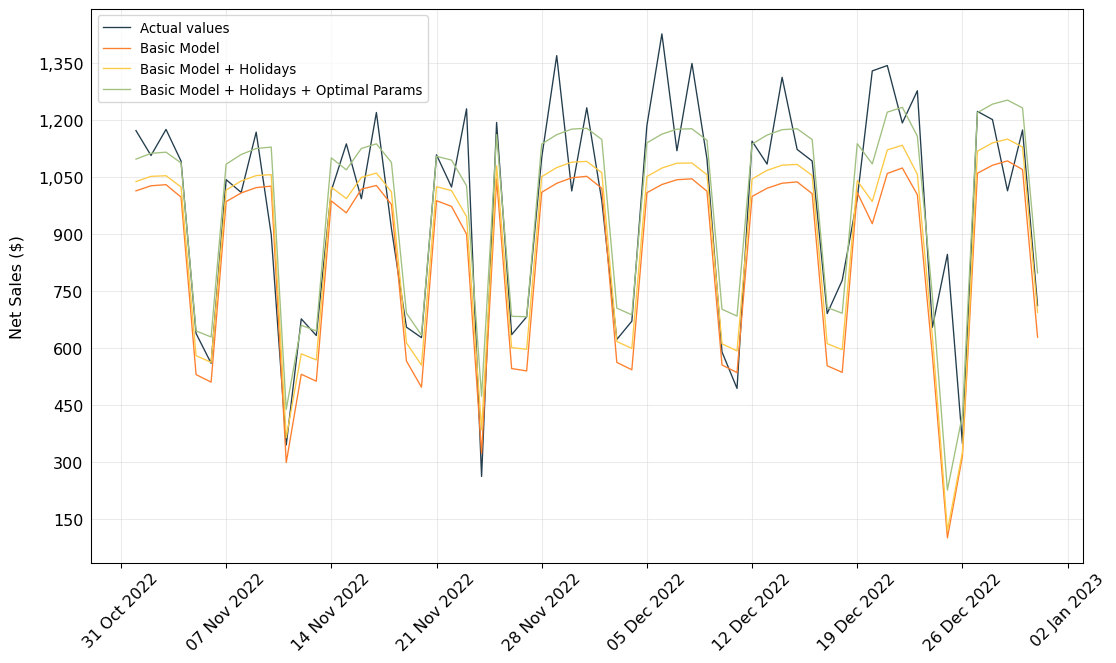

In [31]:
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot line
line = ax.plot(test['ds'], test['y'], color='#233d4d', zorder=2, label='Actual values', linewidth=1)
line1 = ax.plot(forecast.loc[1400:,'ds'], forecast.loc[1400:,'yhat'], color='#fe7f2d', zorder=2, label='Basic Model', linewidth=1)
line2 = ax.plot(forecast.loc[1400:,'ds'], forecast2.loc[1400:,'yhat'], color='#fcca46', zorder=2, label='Basic Model + Holidays', linewidth=1)
line3 = ax.plot(forecast.loc[1400:,'ds'], forecast3.loc[1400:,'yhat'], color='#a1c181', zorder=2, label='Basic Model + Holidays + Optimal Params', linewidth=1)


# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat y-axis
ax.set_ylabel('Net Sales ($)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Reformat x-axis label and tick labels
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=45)

ax.legend()

# Set a white background
fig.patch.set_facecolor('white')

# Export plot as high resolution PNG
plt.savefig('basic model + holidays + opti param.png', bbox_inches="tight", facecolor='white', pad_inches=0.5)

plt.show()